# 미세먼지 예측 성능 향상 프로젝트

# 피드백(2021.11.17)

    - 근거(왜 이렇게 처리했는지에 대한 논리. A/B Test: 했을 때 vs 하지 않았을 때
## 목차
- 1. 프로젝트 개요
    - 1.1 프로젝트 목적
    - 1.2 대기오염물질 종류
- 2. 데이터셋 설명
    - 2-1. 필요 모듈, 라이브러리 가져오기
    - 2-2. 데이터 확인
    - 2-3. 결측치 확인
- 3. 데이터 전처리
    - 3-1. 날짜 데이터 처리
    - 3-2. 결측치 처리
    - 3-3. 각 관측소 시간별 평균 구하기
    - 3-4. 데이터 개수 통일
    - 3-5. 이상치 탐지
    - 3-6. 결측치 처리
    - 3-7. 훈련, 테스트 데이터셋 나누기
    - 3-8. 밀도 추정 그래프 시각화
- 4. 모델 학습 및 평가
    - 4-1. Logistic Regression
    - 4-2. Ensemble(KNN, RandomForest, SVM)
    - 4-3. SVM
    - 4-4. Lasso Regression
    - 4-5. Ridge Regression
    - 4-6. Elastic-net
- 5. 평가 결과 정리

## 1. 프로젝트 개요

### 1-1. 프로젝트 목적

[참고](https://m.news.nate.com/view/20201207n22480)

- 대기측정 전문 스타트업 (주)아림사이언스와 함께 사물인터넷(IoT) 기반의 미세먼지, 오존 등 대기 중 유해물질을 실시간으로 모니터링
- 실외에서는 측정 가능성이 없는 라돈, VOC 대신 자동차, 공장 등에서 나오는 유해물질인 NOx, SOx, 그리고 오존을 미세먼지와 함께 측정할 수 있는 실외용 측정기- 실외에서는 측정 가능성이 없는 라돈, VOC 대신 자동차, 공장 등에서 나오는 유해물질인 NOx, SOx, 그리고 오존을 미세먼지와 함께 측정할 수 있는 실외용 측정기
- 이 시스템을 통해 스마트폰과 PC 등으로 누구나 실시간으로 5개의 주요 대기질 정보(PM 2.4, PM10, 온도, 습도, 오존)를 모니터링할 수 있음
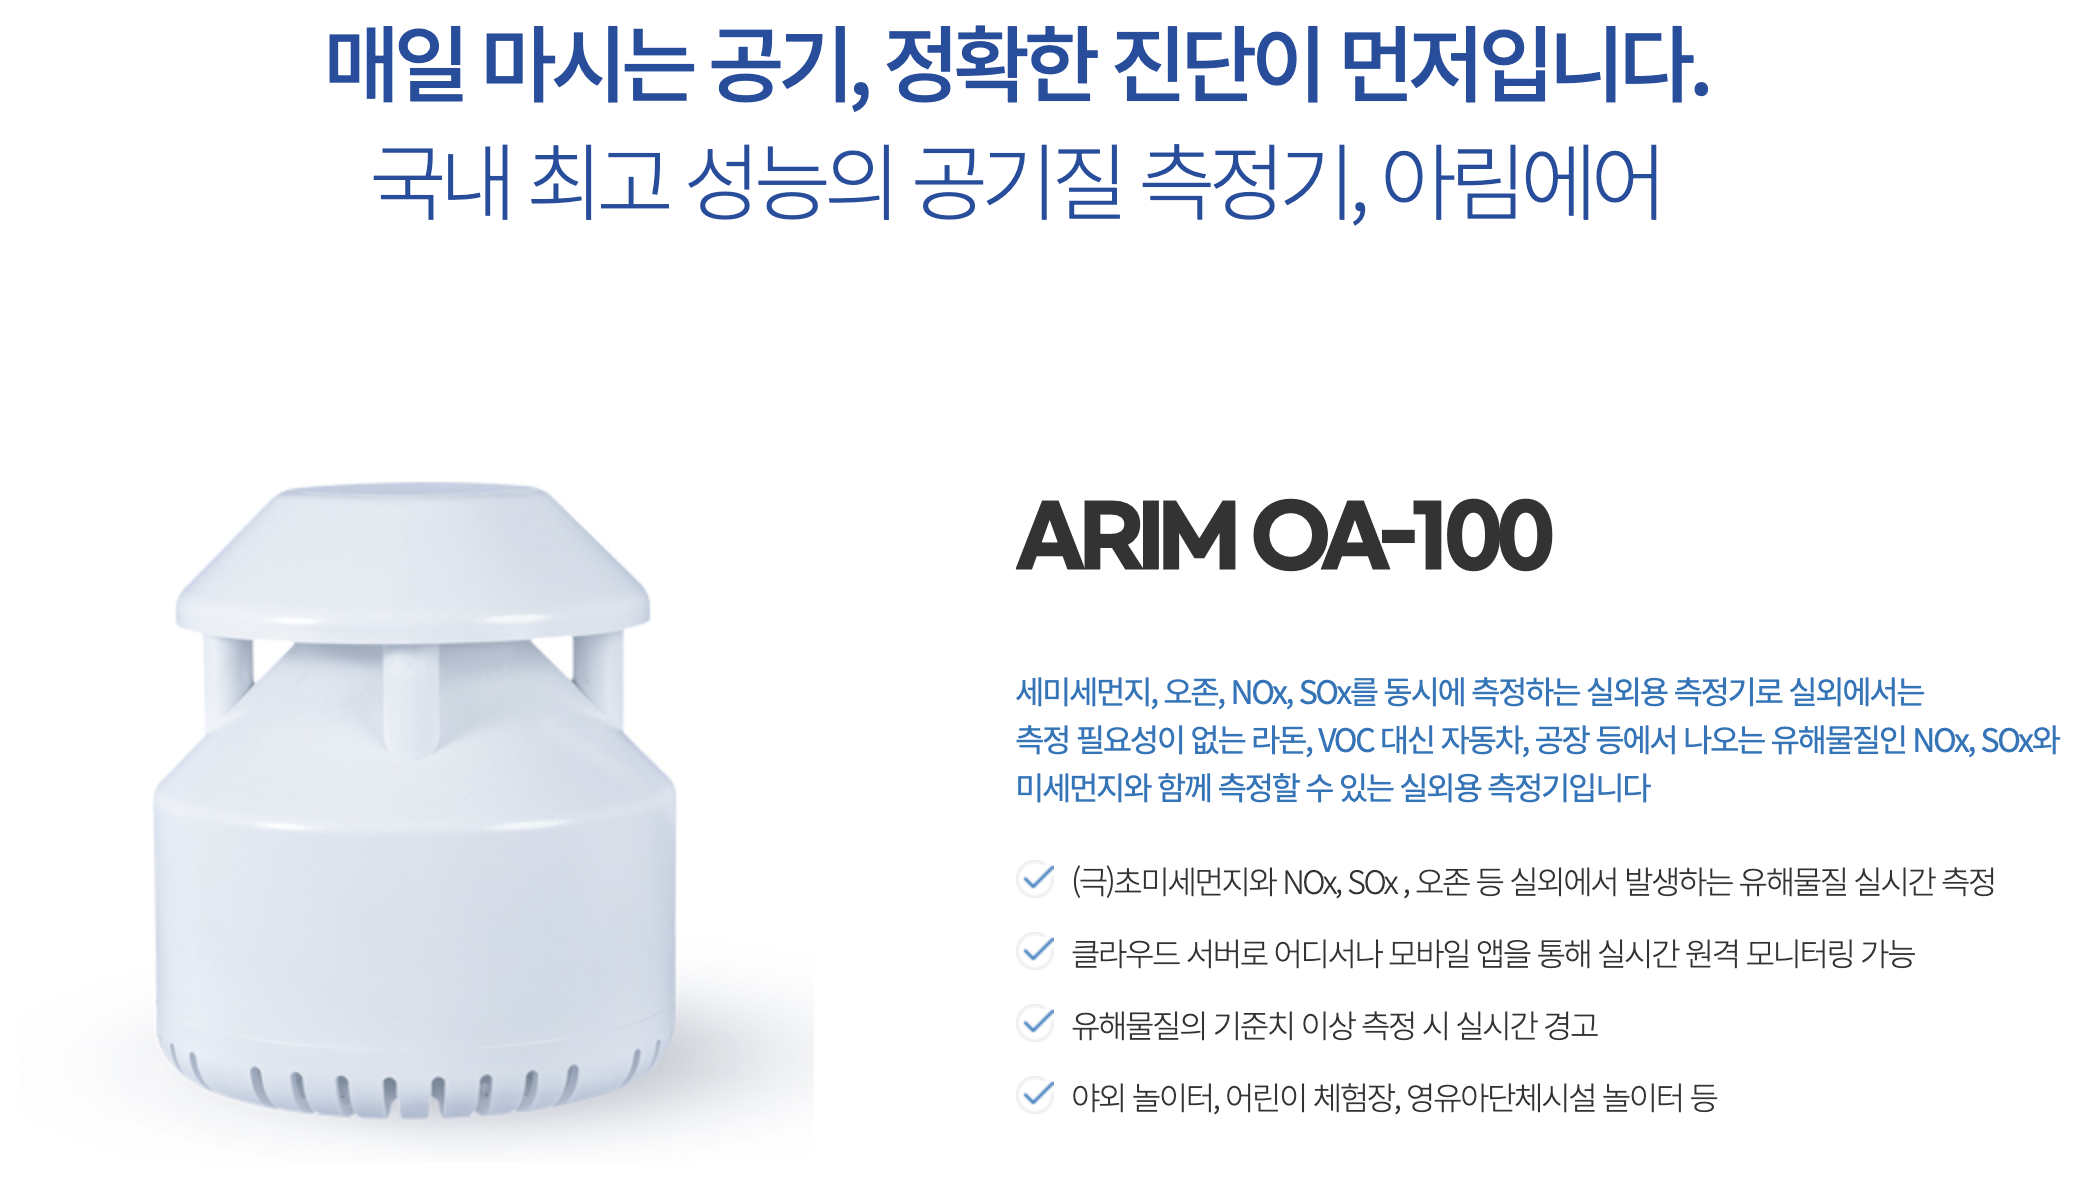


- 아림사이언스의 제품을 이용해 총 7개의 다른 곳에서 측정한 데이터, 보건환경연구원에서 측정한 데이터 제공
- 초 25일, 10월 5일 ~ 10월 29일동안 측정한 초미세먼지, 미세먼지, 황산화물, 질산화물 데이터
    - 아림사이언스 제품의 경우 분 단위 데이터
    - 보건환경연구원의 경우 시간 단위 데이터
- 미세먼지 측정에 비교적 낮은 성능을 보이는 아림사이언스의 제품을 보건환경연구원의 데이터를 바탕으로 성능 향상

### 1-2. 대기오염물질 종류

[참고](https://www.airkorea.or.kr/web/airMatter?pMENU_NO=130)
<br>
(1) 미세먼지($PM_{10}$), 초미세먼지($PM_{2.5}$)
- 미세먼지는 직경에 따라 PM10과 PM2.5 등으로 구분
    - PM10은 1000분의 10mm보다 작은 먼지
    - PM2.5는 1000분의 2.5mm보다 작은 먼지로, 머리카락 직경(약 60ym)의 1/20 ~ 1/30 크기보다 작은 입자
- PM2.5의 경우 상당량이 황산화물(SOx), 질소산화물(NOx), 암모니아(NH3), 휘발성 유기화학물(VOCs) 등의 전구물질이 대기 중의 특정 조건에 반응하여 2차 생성됨
- 미세먼지 조성은 매우 다양하나, 주로 탄소성분(유기탄소, 원소탄소), 이온성분(황산염, 질산염, 암모늄), 광물성분 등으로 구성됨

(2) 아황산가스($SO_2$)
- 황산화물의 일종
- 황을 함유하는 석탄, 석유 등의 화석연료가 연소될 때 인위적으로 배출됨
- 주요 배출원은 발전소, 난방장치, 금속 제련공장, 정유공장 및 기타 산업공정 등에서 발생

(3) 이산화질소($NO_2$)
- 대기 중에서 일산화질소의 산화에 의해서 발생
- 대기 중에서 휘발성유기화합물과 반응하여 오존을 생성하는 전구물질(precursor)의 역할
- 주요 배출원은 자동차, 발전소와 같은 고온 연소공정과 화학물질 제조공정 등이 있으며, 토양중의 세균에 의해 생성되는 자연적 현상 등이 있음
- 질소산화물의 인체영향을 살펴보면, 일산화질소(NO)보다는 이산화질소(NO2)가 인체에 더욱 큰 피해를 주는 것으로 알려져 있음

|지수구분|좋음|보통|나쁨|매우나쁨|
|---|---|---|---|---|
|점수구분값|$$ 0-50 $$|$$51-100$$|$$101-250$$|$$251-500$$|
|아황산가스(ppm)|$$0 - 0.02$$|$$0.021 - 0.05$$|$$0.051 - 0.15$$|$$0.151 - 1$$|
|이산화질소(ppm)|$$0 - 0.03$$|$$0.031 - 0.09$$|$$0.091 - 0.15$$|$$0.151 - 0.6$$|
|미세먼지 PM10|$$0 -30$$|$$31 - 80$$|$$81 - 150$$|$$151 - 600$$|
|미세먼지 PM2.5|$$0 - 15$$|$$16 - 35$$|$$36 - 75$$|$$76 - 500$$|

## 2. 데이터셋 소개
- 대전 지역 8곳에서 측정된 미세먼지 농도
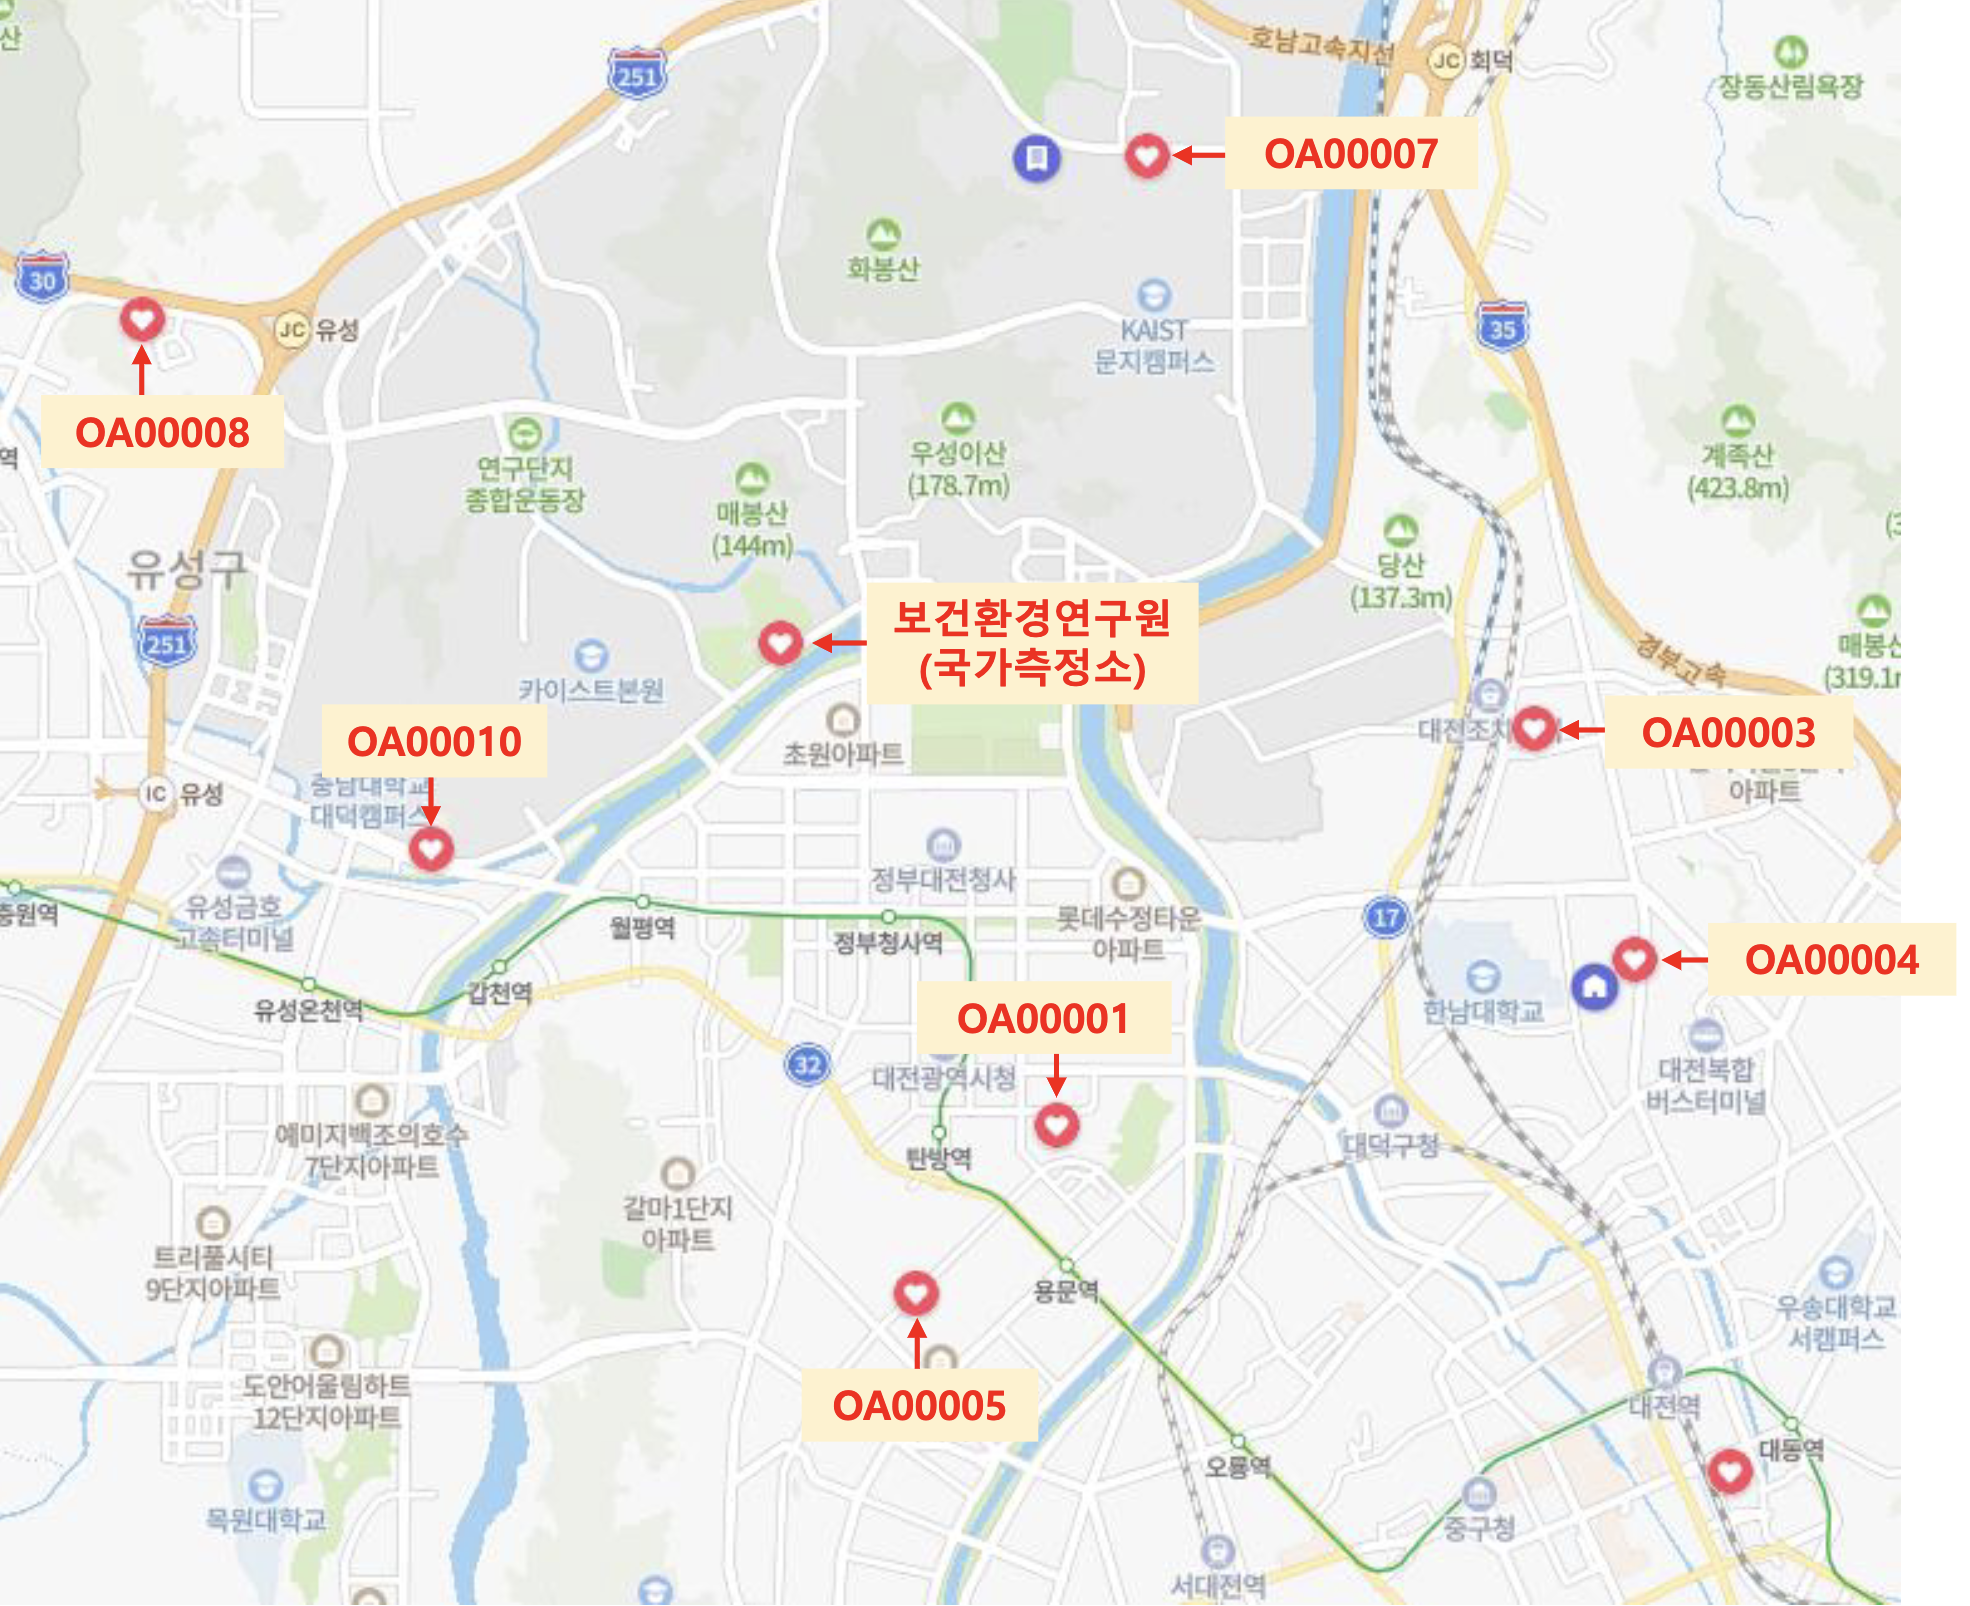
- 보건환경연구원
- 2021년 10월 5일 20:00:00 ~  2021년 10월 29일 15:00:00 1시간 단위 관측
    - Date: 대기 측정 일시의 연/월/일/시
    - pm25: 초미세먼지
    - pm10: 미세먼지
    - so2: 황산화물
    - no2: 질산화물
- OA00001/OA00003/OA00004/OA00005/OA00007/OA00008/OA00010
- 2021년 10월 5일 20:00 ~ 2021년 10월 29일 14:59분까지 1분 단위
    - reg_date: 측정 일시의 연/월/일/시/분
    - device_id: 대기 측정 장비 식별 ID
    - pm25: 초미세먼지
    - pm10: 미세먼지
    - so2: 황산화물
    - no2: 질산화물
    - temp: 온도
    - humi: 습도

### 2-1. 필요 모둘, 라이브러리 가져오기

In [1]:
!pip install plotly

In [2]:
!pip install lightgbm

In [3]:
!pip install xgboost

In [4]:
!pip install missingno

In [5]:
import os
import gc
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import glob
import numpy as np
import datetime

# import lightgbm as lgb
# import xgboost as xgb
# from lightgbm import LGBMRegressor

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from pylab import rcParams
from plotly import tools
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

from numpy.random import normal, seed

import seaborn as sns
import missingno as msno

from scipy.stats import norm
import math

from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict ,train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeCV, SGDRegressor

np.random.seed(40)

from IPython.core import display as ICD

In [6]:
!pip install openpyxl

In [7]:
data = {'OA1':pd.read_csv('./data/OA00001.csv'),
        'OA3':pd.read_csv('./data/OA00003.csv'),
        'OA4':pd.read_csv('./data/OA00004.csv'),
        'OA5':pd.read_csv('./data/OA00005.csv'),
        'OA7':pd.read_csv('./data/OA00007.csv'),
        'OA8':pd.read_csv('./data/OA00008.csv'),
        'OA10':pd.read_csv('./data/OA00010.csv'),
        'WLH':pd.read_excel('./data/보건환경연구원.xlsx', engine = 'openpyxl')
}

### 2-2. 데이터 확인

In [8]:
data['WLH'].sort_values('Date',inplace = True)

In [9]:
for name, df in data.items():
    print(name)
    ICD.display(df.head(2))

OA1


reg_date device_id  pm25  pm10    so2    no2  temp  humi
0  2021-10-05 20:00   OA00001  5.75  5.76  0.004  0.027  26.3  61.5
1  2021-10-05 20:01   OA00001  6.06  6.06  0.004  0.027  26.2  61.7

OA3


reg_date device_id  pm25  pm10    so2    no2   temp   humi
0  2021-10-05 20:00   OA00003   8.6  8.61  0.004  0.064  26.48  59.15
1  2021-10-05 20:01   OA00003   7.5  7.50  0.004  0.064  26.49  59.12

OA4


reg_date device_id  pm25  pm10  so2  no2   temp   humi
0  2021-10-05 19:11   OA00004  9.76  9.85  0.0  0.0  26.03  58.54
1  2021-10-05 19:12   OA00004  8.92  8.92  0.0  0.0  26.04  58.45

OA5


reg_date device_id   pm25   pm10    so2    no2   temp   humi
0  2021-10-05 20:00   OA00005  10.68  10.68  0.007  0.054  27.69  55.92
1  2021-10-05 20:01   OA00005   9.71   9.71  0.007  0.053  27.69  55.94

OA7


reg_date device_id  pm25  pm10    so2    no2   temp   humi
0  2021-10-05 20:00   OA00007  8.73  8.73  0.006  0.061  22.84  76.02
1  2021-10-05 20:01   OA00007  8.41  8.47  0.006  0.062  22.81  76.07

OA8


reg_date device_id   pm25   pm10    so2    no2   temp   humi
0  2021-10-05 20:00   OA00008   8.11   8.11  0.008  0.094  24.28  70.94
1  2021-10-05 20:01   OA00008  10.23  10.28  0.012  0.120  24.02  72.05

OA10


reg_date device_id   pm25   pm10    so2    no2   temp   humi
0  2021-10-05 20:00   OA00010   9.44   9.46  0.007  0.065  25.62  63.49
1  2021-10-05 20:01   OA00010  10.39  10.39  0.007  0.063  25.62  63.48

WLH


Date  pm25  pm10    so2    no2
571 2021-10-05 20:00:00  12.0  24.0  0.003  0.012
570 2021-10-05 21:00:00  11.0  25.0  0.003  0.015

### 2-3. 결측치 확인

Nullity of Data


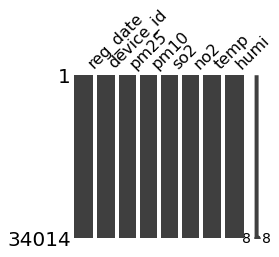

In [10]:
print("Nullity of Data")
msno.matrix(data['OA1'], figsize = (3,3))
plt.show()

Nullity of Data


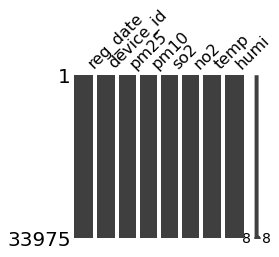

In [11]:
print("Nullity of Data")
msno.matrix(data['OA3'], figsize = (3,3))
plt.show()

Nullity of Data


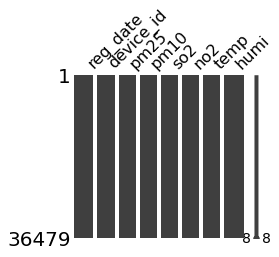

In [12]:
print("Nullity of Data")
msno.matrix(data['OA4'], figsize = (3,3))
plt.show()

Nullity of Data


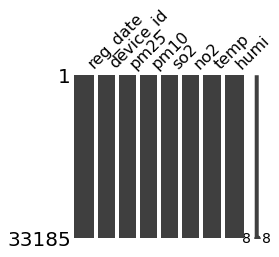

In [13]:
print("Nullity of Data")
msno.matrix(data['OA5'], figsize = (3,3))
plt.show()

Nullity of Data


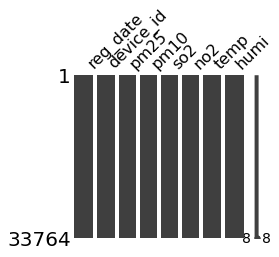

In [14]:
print("Nullity of Data")
msno.matrix(data['OA7'], figsize = (3,3))
plt.show()

Nullity of Data


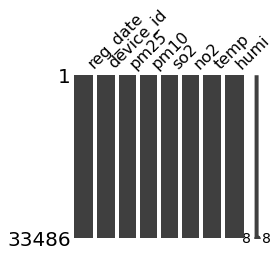

In [15]:
print("Nullity of Data")
msno.matrix(data['OA8'], figsize = (3,3))
plt.show()

Nullity of Data


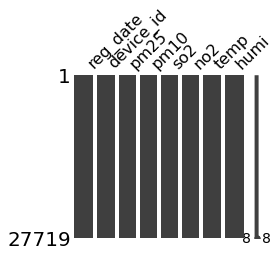

In [16]:
print("Nullity of Data")
msno.matrix(data['OA10'], figsize = (3,3))
plt.show()

Nullity of Data


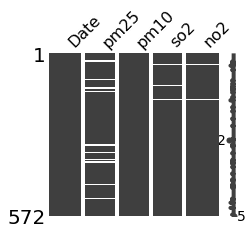

In [17]:
print("Nullity of Data")
msno.matrix(data['WLH'], figsize = (3,3))
plt.show()

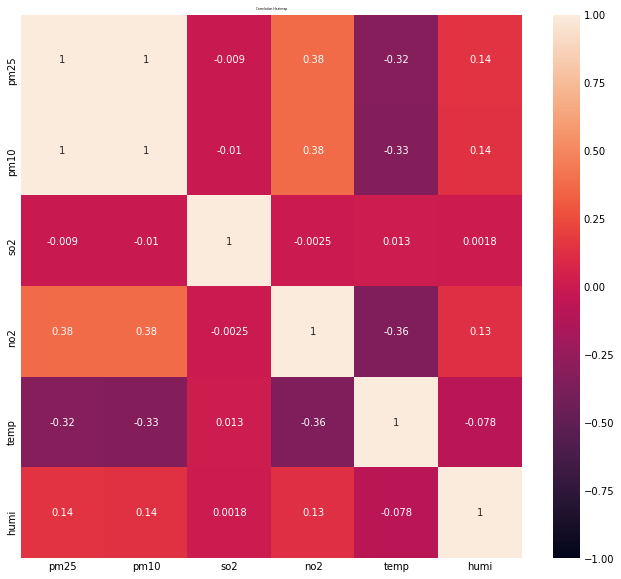

In [18]:
#  pm25에 영향도 있는 컬럼: pm25(1) > pm10(1) > no2(0.38) > humi(0.14)
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(data['OA1'].corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':3}, pad = 5)
plt.show()

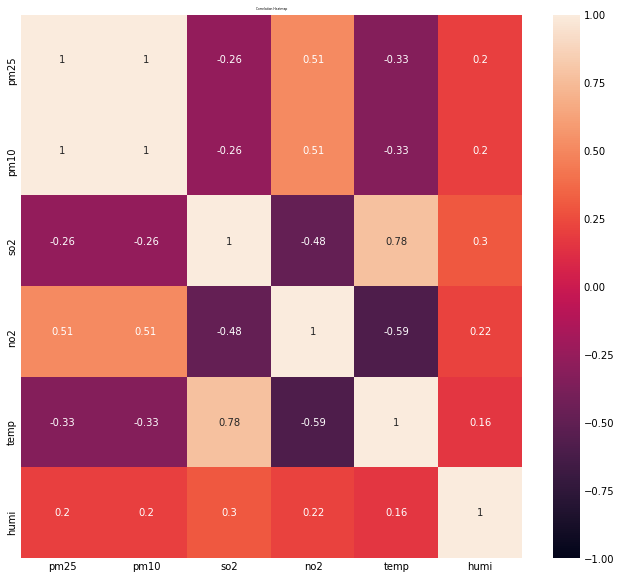

In [19]:
# pm25에 영향도 있는 컬럼: pm25(1) > pm10(1) > no2(0.51) > humi(0.2)
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(data['OA3'].corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':3}, pad = 5)
plt.show()

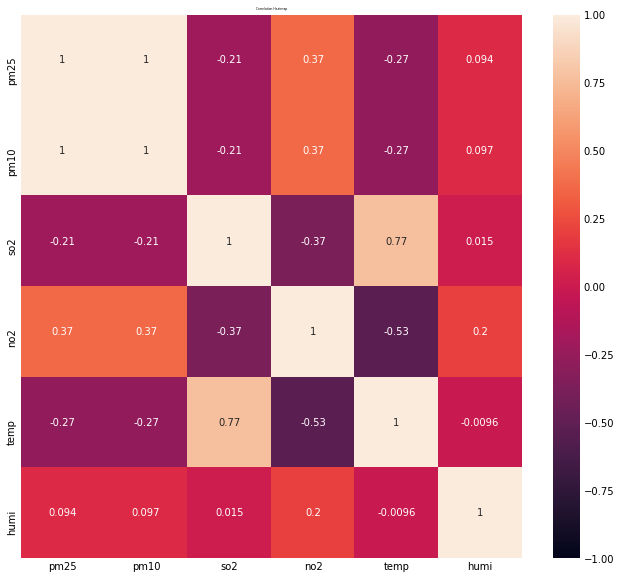

In [20]:
# pm25에 영향도 있는 컬럼: pm25(1) > pm10(1) > no2(0.37) > humi(0.094)
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(data['OA4'].corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':3}, pad = 5)
plt.show()

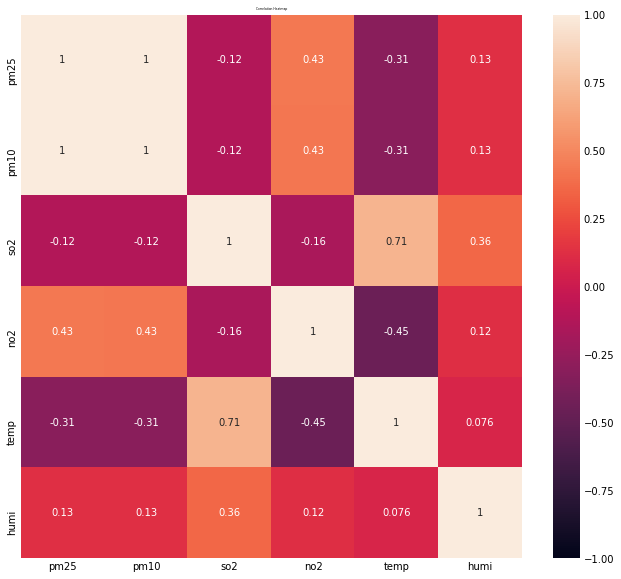

In [21]:
# pm25에 영향도 있는 컬럼: pm25(1) > pm10(1) > no2(0.43) > humi(0.13)
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(data['OA5'].corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':3}, pad = 5)
plt.show()

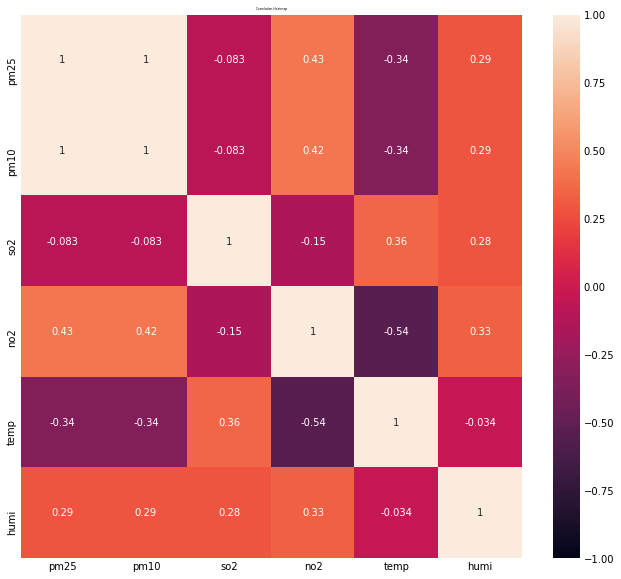

In [22]:
# pm25에 영향도 있는 컬럼: pm25(1) > pm10(1) > no2(0.43) > humi(0.29)
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(data['OA7'].corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':3}, pad = 5)
plt.show()

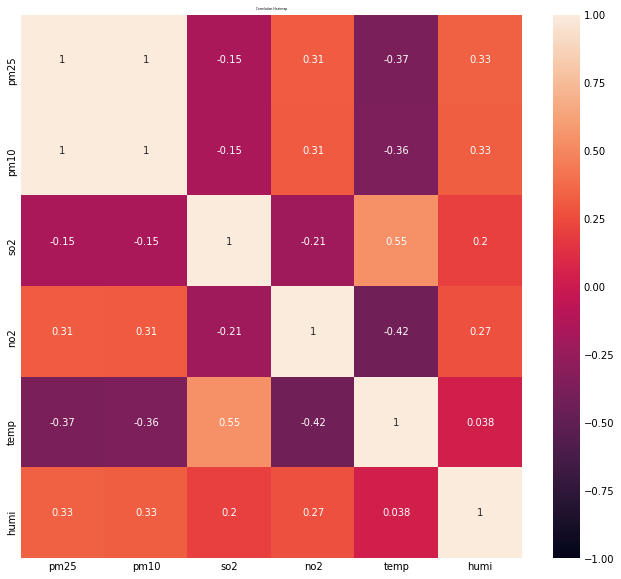

In [23]:
# pm25에 영향도 있는 컬럼: pm25(1) > pm10(1) > humi(0.33) > no2(0.31)
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(data['OA8'].corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':3}, pad = 5)
plt.show()

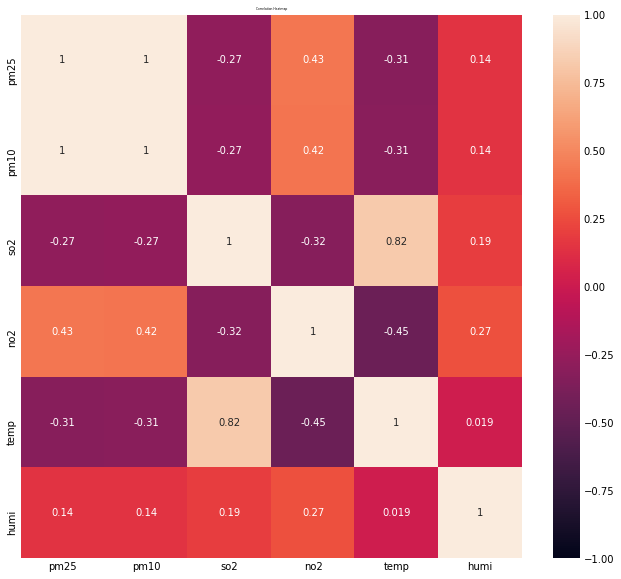

In [24]:
# pm25에 영향도 있는 컬럼: pm25(1) > pm10(1) > no2(0.43) > humi(0.14)
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(data['OA10'].corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':3}, pad = 5)
plt.show()

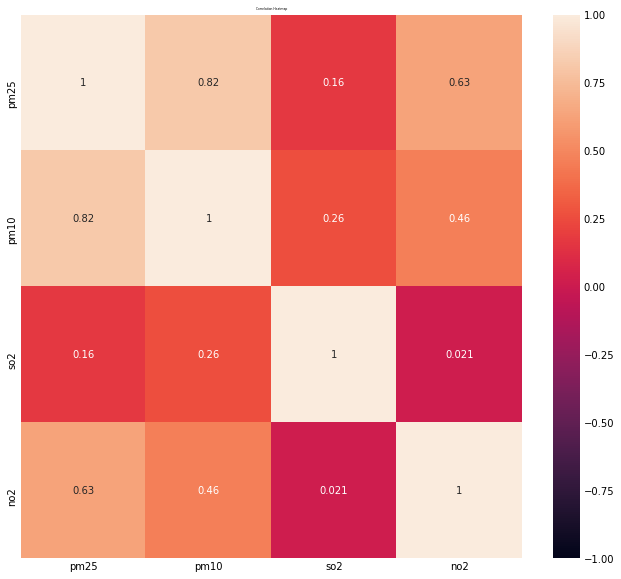

In [25]:
# pm25에 영향도 있는 컬럼: pm25(1) > pm10(0.92) > no2(0.63) > so2(0.16)
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(data['WLH'].corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':3}, pad = 5)
plt.show()

## 3. 데이터 전처리

### 3-1. 날짜 데이터 처리

In [26]:
def date_format(df, date_col, add = True):
    df[date_col] = pd.to_datetime(df[date_col])
    if add:
        df['year'] = df[date_col].dt.year
        df['month'] = df[date_col].dt.month
        df['day'] = df[date_col].dt.day
        df['hour'] = df[date_col].dt.hour
        df['minute'] = df[date_col].dt.minute
    df[date_col] = pd.to_datetime(df[date_col].dt.date)
    return df

In [27]:
data['OA1'] = date_format(data['OA1'], 'reg_date')
data['OA3'] = date_format(data['OA3'], 'reg_date')
data['OA4'] = date_format(data['OA4'], 'reg_date')
data['OA5'] = date_format(data['OA5'], 'reg_date')
data['OA7'] = date_format(data['OA7'], 'reg_date')
data['OA8'] = date_format(data['OA8'], 'reg_date')
data['OA10'] = date_format(data['OA10'], 'reg_date')
data['WLH'] = date_format(data['WLH'], 'Date')

print(data['OA1'].shape)
data['OA1'].head()

(34014, 13)


reg_date device_id  pm25  pm10    so2    no2  temp  humi  year  month  \
0 2021-10-05   OA00001  5.75  5.76  0.004  0.027  26.3  61.5  2021     10   
1 2021-10-05   OA00001  6.06  6.06  0.004  0.027  26.2  61.7  2021     10   
2 2021-10-05   OA00001  5.84  5.84  0.004  0.027  26.2  61.8  2021     10   
3 2021-10-05   OA00001  5.32  5.32  0.004  0.027  26.2  61.9  2021     10   
4 2021-10-05   OA00001  5.95  5.95  0.004  0.026  26.1  62.2  2021     10   

   day  hour  minute  
0    5    20       0  
1    5    20       1  
2    5    20       2  
3    5    20       3  
4    5    20       4

### 3-2. 결측치 처리
- 만약 결측치가 있다면, 2가지 방법으로 결측치 처리해 줄 수 있음
    - 1. 결측치가 있는 데이터를 모두 삭제(drop)
    - 2. 결측치 양옆의 값들을 이용해서 적절히 보간(interpolate)하여 대입
        - ex) 2와 4사이 데이터가 NaN이라면 이 값을 3으로 채우는 방식
- 이번 경우라면 시간을 index로 가지는 시계열 데이터이므로 삭제하는 것보다는 '보간'하는 방법을 선택

#### data['WLH]

In [28]:
data['OA1'].set_index('reg_date', inplace = True)
data['OA3'].set_index('reg_date', inplace = True)
data['OA4'].set_index('reg_date', inplace = True)
data['OA5'].set_index('reg_date', inplace = True)
data['OA7'].set_index('reg_date', inplace = True)
data['OA8'].set_index('reg_date', inplace = True)
data['OA10'].set_index('reg_date', inplace = True)
data['WLH'].set_index('Date', inplace = True)

In [29]:
# 결측치가 있다면 이를 보간. 보간 기준은 new_date을 선택
data['WLH']['pm10'] = data['WLH']['pm10'].interpolate(method = 'time')

# 보간 이후 결측치(NaN) 유무를 다시 확인
print(data['WLH']['pm10'][data['WLH']['pm10'].isna()])

Series([], Name: pm10, dtype: float64)


In [30]:
data['WLH']['so2'] = data['WLH']['so2'].interpolate(method = 'time')
print(data['WLH']['so2'][data['WLH']['so2'].isna()])

Series([], Name: so2, dtype: float64)


In [31]:
data['WLH']['no2'] = data['WLH']['no2'].interpolate(method = 'time')
print(data['WLH']['no2'][data['WLH']['no2'].isna()])

Series([], Name: no2, dtype: float64)


In [32]:
data['WLH']['pm25'] = data['WLH']['pm25'].interpolate(method = 'time')
print(data['WLH']['pm25'][data['WLH']['pm25'].isna()])

Series([], Name: pm25, dtype: float64)


In [33]:
data['OA3']

device_id  pm25  pm10    so2    no2   temp   humi  year  month  \
reg_date                                                                    
2021-10-05   OA00003  8.60  8.61  0.004  0.064  26.48  59.15  2021     10   
2021-10-05   OA00003  7.50  7.50  0.004  0.064  26.49  59.12  2021     10   
2021-10-05   OA00003  8.63  8.63  0.004  0.063  26.48  59.39  2021     10   
2021-10-05   OA00003  8.26  8.26  0.004  0.062  26.56  58.86  2021     10   
2021-10-05   OA00003  7.95  7.95  0.004  0.062  26.60  58.89  2021     10   
...              ...   ...   ...    ...    ...    ...    ...   ...    ...   
2021-10-29   OA00003  3.39  3.39  0.001  0.039  18.92  40.92  2021     10   
2021-10-29   OA00003  3.07  3.07  0.001  0.038  18.93  40.76  2021     10   
2021-10-29   OA00003  3.32  3.32  0.001  0.041  18.96  40.94  2021     10   
2021-10-29   OA00003  3.10  3.10  0.001  0.041  18.96  40.88  2021     10   
2021-10-29   OA00003  3.54  3.54  0.001  0.041  18.95  40.79  2021     10   

            day  hour  minute  
reg_date                       
2021-10-05    5    20       0  
2021-10-05    5    20       1  
2021-10-05    5    20       2  
2021-10-05    5    20       3  
2021-10-05    5    20       4  
...         ...   ...     ...  
2021-10-29   29    14      55  
2021-10-29   29    14      56  
2021-10-29   29    14      57  
2021-10-29   29    14      58  
2021-10-29   29    14      59  

[33975 rows x 12 columns]

In [34]:
data['WLH'].isna().sum()

pm25      0
pm10      0
so2       0
no2       0
year      0
month     0
day       0
hour      0
minute    0
dtype: int64

In [35]:
standard_df = data['WLH'].rename_axis('reg_date').reset_index()

### 3-3. 각 관측소 시간별 평균 구하기

In [36]:
data['OA1']

device_id  pm25  pm10    so2    no2  temp  humi  year  month  day  \
reg_date                                                                       
2021-10-05   OA00001  5.75  5.76  0.004  0.027  26.3  61.5  2021     10    5   
2021-10-05   OA00001  6.06  6.06  0.004  0.027  26.2  61.7  2021     10    5   
2021-10-05   OA00001  5.84  5.84  0.004  0.027  26.2  61.8  2021     10    5   
2021-10-05   OA00001  5.32  5.32  0.004  0.027  26.2  61.9  2021     10    5   
2021-10-05   OA00001  5.95  5.95  0.004  0.026  26.1  62.2  2021     10    5   
...              ...   ...   ...    ...    ...   ...   ...   ...    ...  ...   
2021-10-29   OA00001  2.31  2.31  0.004  0.017  24.5  29.8  2021     10   29   
2021-10-29   OA00001  2.07  2.07  0.004  0.018  24.4  30.1  2021     10   29   
2021-10-29   OA00001  1.99  1.99  0.004  0.017  24.5  30.0  2021     10   29   
2021-10-29   OA00001  2.10  2.10  0.004  0.019  24.5  29.7  2021     10   29   
2021-10-29   OA00001  2.24  2.24  0.004  0.017  24.5  29.8  2021     10   29   

            hour  minute  
reg_date                  
2021-10-05    20       0  
2021-10-05    20       1  
2021-10-05    20       2  
2021-10-05    20       3  
2021-10-05    20       4  
...          ...     ...  
2021-10-29    14      55  
2021-10-29    14      56  
2021-10-29    14      57  
2021-10-29    14      58  
2021-10-29    14      59  

[34014 rows x 12 columns]

In [37]:
OA1 = data['OA1'].rename_axis('reg_date').reset_index()

In [38]:
data['OA1'] = \
data['OA1'].groupby(['day', 'hour'], as_index = False)[['pm25', 'pm10', 'so2', 'no2', 'temp', 'humi']].mean()

data['OA3'] = \
data['OA3'].groupby(['day', 'hour'], as_index = False)[['pm25', 'pm10', 'so2', 'no2', 'temp', 'humi']].mean()

data['OA4'] = \
data['OA4'].groupby(['day', 'hour'], as_index = False)[['pm25', 'pm10', 'so2', 'no2', 'temp', 'humi']].mean()

data['OA5'] = \
data['OA5'].groupby(['day', 'hour'], as_index = False)[['pm25', 'pm10', 'so2', 'no2', 'temp', 'humi']].mean()

data['OA7'] = \
data['OA7'].groupby(['day', 'hour'], as_index = False)[['pm25', 'pm10', 'so2', 'no2', 'temp', 'humi']].mean()

data['OA8'] = \
data['OA8'].groupby(['day', 'hour'], as_index = False)[['pm25', 'pm10', 'so2', 'no2', 'temp', 'humi']].mean()

data['OA10'] = \
data['OA10'].groupby(['day', 'hour'], as_index = False)[['pm25', 'pm10', 'so2', 'no2', 'temp', 'humi']].mean()

In [39]:
print(data['OA1'].shape)
print(data['OA3'].shape)
print(data['OA4'].shape)
print(data['OA5'].shape)
print(data['OA7'].shape)
print(data['OA8'].shape)
print(data['OA10'].shape)

(571, 8)
(571, 8)
(572, 8)
(561, 8)
(571, 8)
(571, 8)
(569, 8)


### 3-4. 데이터 개수 통일

In [40]:
standard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   reg_date  572 non-null    datetime64[ns]
 1   pm25      572 non-null    float64       
 2   pm10      572 non-null    float64       
 3   so2       572 non-null    float64       
 4   no2       572 non-null    float64       
 5   year      572 non-null    int64         
 6   month     572 non-null    int64         
 7   day       572 non-null    int64         
 8   hour      572 non-null    int64         
 9   minute    572 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 44.8 KB


In [41]:
standard_data = data['WLH'].rename_axis('reg_date').reset_index()
standard_data.drop(['pm25', 'pm10', 'so2', 'no2', 'year', 'month'], axis = 1, inplace = True)
standard_data.head()

reg_date  day  hour  minute
0 2021-10-05    5    20       0
1 2021-10-05    5    21       0
2 2021-10-05    5    22       0
3 2021-10-05    5    23       0
4 2021-10-06    6     0       0

In [42]:
standard_df.drop(['pm25', 'pm10', 'so2', 'no2', 'year', 'month', 'minute'], axis = 1, inplace = True)
standard_df.head(3)

reg_date  day  hour
0 2021-10-05    5    20
1 2021-10-05    5    21
2 2021-10-05    5    22

In [43]:
OA1 = pd.merge(standard_df, data['OA1'], how = 'left', left_on = ['day', 'hour'], right_on = ['day', 'hour'])
OA3 = pd.merge(standard_df, data['OA3'], how = 'left', left_on = ['day', 'hour'], right_on = ['day', 'hour'])
OA4 = pd.merge(standard_df, data['OA4'], how = 'left', left_on = ['day', 'hour'], right_on = ['day', 'hour'])
OA5 = pd.merge(standard_df, data['OA5'], how = 'left', left_on = ['day', 'hour'], right_on = ['day', 'hour'])
OA7 = pd.merge(standard_df, data['OA7'], how = 'left', left_on = ['day', 'hour'], right_on = ['day', 'hour'])
OA8 = pd.merge(standard_df, data['OA8'], how = 'left', left_on = ['day', 'hour'], right_on = ['day', 'hour'])
OA10 = pd.merge(standard_df, data['OA10'], how = 'left', left_on = ['day', 'hour'], right_on = ['day', 'hour'])

### 3-5. 이상치 탐지

#### IQR method
- 사분위범위수 IQR(Interquartile range)을 이용하여 이상치 탐지
- IQR은 제 3사분위수에서 제 1사분위 값을 뺀 값으로 데이터의 중간 50%의 범위
- Q1  - 1.5 * IQR보다 왼쪽에 있거나, Q3 + 1.5∗IQR 보다 오른쪽에 있는 경우 우리는 이상치라고 판단
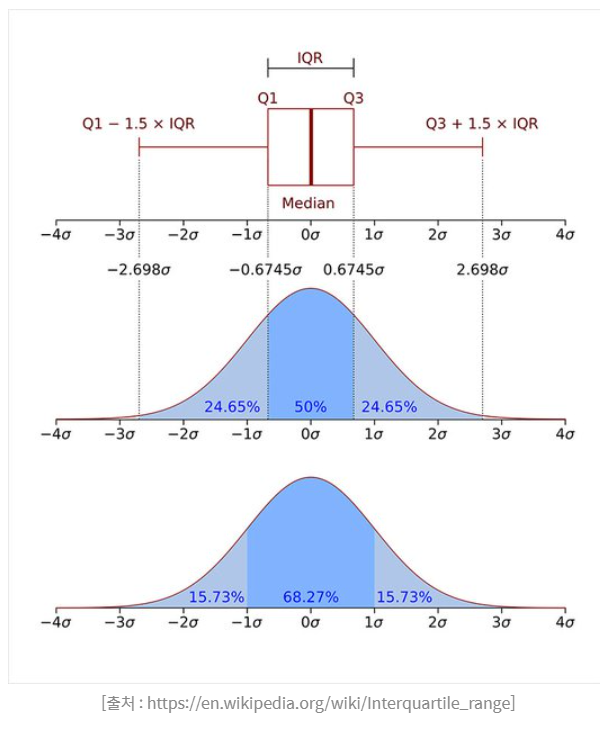

In [45]:
WLH = data['WLH'].reset_index()

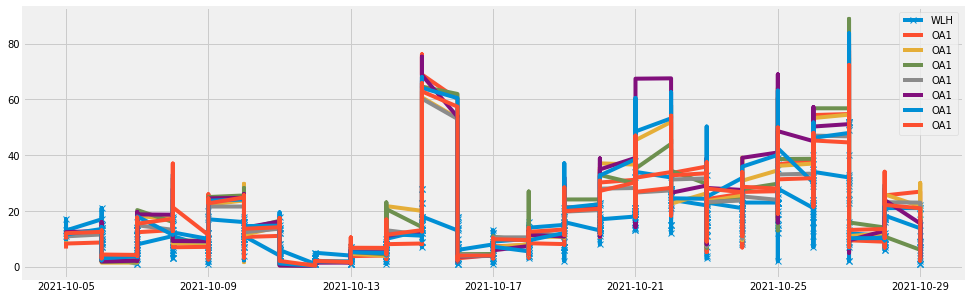

In [46]:
# 데이터 시각화 -> 이상치 처리
# 실제 값과 예측 값을 plotting (Test Set 예측결과로)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(WLH['Date'], WLH['pm25'], label='WLH', marker='x')
plt.plot(OA1['reg_date'], OA1['pm25'], label='OA1')
plt.plot(OA3['reg_date'], OA3['pm25'], label='OA1')
plt.plot(OA4['reg_date'], OA4['pm25'], label='OA1')
plt.plot(OA5['reg_date'], OA5['pm25'], label='OA1')
plt.plot(OA7['reg_date'], OA7['pm25'], label='OA1')
plt.plot(OA8['reg_date'], OA8['pm25'], label='OA1')
plt.plot(OA10['reg_date'], OA10['pm25'], label='OA1')

plt.legend()
plt.show()

In [47]:
def outlier(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df[(df[col] < q1 - 1.5*iqr) | (df[col] > q3 + 1.5 * iqr)]

In [101]:
outlier(OA1, 'pm25')

day  hour       pm25        pm10    so2       no2       temp  \
reg_date                                                                   
2021-10-15   15    18  61.666333  125.321333  0.004  0.038650  20.860000   
2021-10-15   15    19  59.498333  120.976333  0.004  0.034600  20.633333   
2021-10-15   15    20  72.160667  146.777500  0.004  0.031633  20.475000   
2021-10-15   15    21  70.629333  144.334333  0.004  0.031500  20.243333   
2021-10-15   15    22  76.163667  156.429833  0.004  0.029583  20.195000   
2021-10-15   15    23  68.897797  141.748983  0.004  0.027051  20.025424   
2021-10-16   16     0  60.100167  123.419000  0.004  0.026100  19.866667   
2021-10-16   16     1  57.413500  118.065167  0.004  0.025683  19.735000   
2021-10-27   27     9  58.225833  118.309000  0.004  0.039700  15.106667   
2021-10-27   27    10  66.429153  135.116610  0.004  0.037814  17.979661   
2021-10-27   27    11  77.443898  158.234068  0.004  0.022881  21.130508   
2021-10-27   27    12  62.983833  128.087167  0.004  0.019350  23.601667   

                 humi  
reg_date               
2021-10-15  80.308333  
2021-10-15  81.038333  
2021-10-15  81.693333  
2021-10-15  82.675000  
2021-10-15  83.300000  
2021-10-15  83.513559  
2021-10-16  83.448333  
2021-10-16  83.880000  
2021-10-27  70.163333  
2021-10-27  64.337288  
2021-10-27  52.238983  
2021-10-27  42.893333

In [111]:
outlier(OA1, 'no2')

day  hour       pm25       pm10       so2       no2       temp  \
reg_date                                                                     
2021-10-06    6    13   5.956833   6.233500  0.004017  0.012550  32.145000   
2021-10-06    6    14   4.905763   4.907797  0.004000  0.012068  33.393220   
2021-10-06    6    15   5.137167   5.137167  0.004017  0.013867  32.291667   
2021-10-09    9    12   4.587667   4.587667  0.004000  0.014800  30.695000   
2021-10-09    9    13   5.620333   6.050833  0.004000  0.014500  32.281667   
...         ...   ...        ...        ...       ...       ...        ...   
2021-10-29   29     0  26.909831  54.035254  0.004000  0.048339  13.713559   
2021-10-29   29     1  25.591000  51.433500  0.004000  0.045600  13.636667   
2021-10-29   29     2  21.349333  42.875500  0.004000  0.040533  13.345000   
2021-10-29   29     7  20.849333  41.850167  0.004000  0.045133  12.653333   
2021-10-29   29     8   9.821333  14.953667  0.004000  0.043433  14.323333   

                 humi  
reg_date               
2021-10-06  44.178333  
2021-10-06  40.261017  
2021-10-06  42.000000  
2021-10-09  53.153333  
2021-10-09  49.648333  
...               ...  
2021-10-29  62.042373  
2021-10-29  62.808333  
2021-10-29  64.038333  
2021-10-29  67.868333  
2021-10-29  61.163333  

[61 rows x 8 columns]

In [107]:
outlier(OA3, 'pm25')

day  hour       pm25       pm10       so2       no2       temp  \
reg_date                                                                     
2021-10-15   15    18  54.020333  55.083333  0.002000  0.096917  21.226500   
2021-10-15   15    19  57.593051  58.574068  0.002000  0.093492  21.117288   
2021-10-15   15    20  59.240167  60.540833  0.002000  0.084033  20.950833   
2021-10-15   15    21  58.586000  60.097333  0.002000  0.077783  20.706500   
2021-10-15   15    23  60.711167  63.123833  0.002000  0.071900  20.278667   
2021-10-16   16     0  53.286000  55.433167  0.002000  0.061683  20.233333   
2021-10-21   21    21  56.726500  58.302333  0.000767  0.132850  12.567833   
2021-10-21   21    22  56.145763  57.547458  0.000254  0.125983  11.946610   
2021-10-25   25     7  54.440833  54.640333  0.001000  0.093133  10.099333   
2021-10-25   25     8  55.436271  55.610339  0.001542  0.083051  12.332034   
2021-10-25   25     9  60.446000  60.717667  0.001200  0.093700  12.181333   
2021-10-25   25    10  64.110000  64.756167  0.000383  0.093950  13.523000   
2021-10-26   26    22  53.081833  53.552667  0.000000  0.126583  15.090667   
2021-10-26   26    23  53.308500  53.767000  0.000000  0.120467  14.671333   
2021-10-27   27     0  54.514333  55.113667  0.000000  0.102850  14.492167   
2021-10-27   27     1  54.152000  54.671000  0.000517  0.093717  14.322167   
2021-10-27   27     2  53.996833  54.626500  0.000867  0.080383  14.182333   
2021-10-27   27     3  53.644833  54.357167  0.001000  0.073250  14.073667   
2021-10-27   27     4  54.215000  54.885167  0.000917  0.081267  13.864833   
2021-10-27   27     5  55.211333  56.061500  0.000117  0.091617  13.513833   
2021-10-27   27     6  54.843833  55.714167  0.000650  0.099983  13.130167   
2021-10-27   27     7  55.179167  56.083833  0.000717  0.117667  13.254333   
2021-10-27   27     8  56.203500  57.192167  0.000683  0.110500  14.108500   
2021-10-27   27     9  57.712167  58.947500  0.000000  0.098217  15.419500   
2021-10-27   27    10  63.902203  65.686102  0.000407  0.092559  16.971695   
2021-10-27   27    11  76.093000  79.491333  0.000667  0.059383  18.552500   
2021-10-27   27    12  69.781833  72.456500  0.001000  0.040400  18.949833   

                 humi  
reg_date               
2021-10-15  78.007833  
2021-10-15  78.675763  
2021-10-15  78.738333  
2021-10-15  79.242333  
2021-10-15  81.330667  
2021-10-16  80.898667  
2021-10-21  63.075000  
2021-10-21  65.682034  
2021-10-25  75.665167  
2021-10-25  67.813559  
2021-10-25  69.828000  
2021-10-25  66.293667  
2021-10-26  65.022500  
2021-10-26  65.790833  
2021-10-27  66.171167  
2021-10-27  67.028167  
2021-10-27  67.502167  
2021-10-27  68.592167  
2021-10-27  69.988000  
2021-10-27  71.993000  
2021-10-27  73.775000  
2021-10-27  74.329167  
2021-10-27  72.356500  
2021-10-27  69.234167  
2021-10-27  65.582203  
2021-10-27  59.916833  
2021-10-27  54.356333

In [108]:
outlier(OA4, 'pm25')

day  hour       pm25       pm10       so2       no2       temp  \
reg_date                                                                     
2021-10-15   15    18  60.952667  62.394167  0.006717  0.080233  19.923833   
2021-10-15   15    19  63.396833  64.610000  0.006783  0.079700  19.807667   
2021-10-15   15    20  62.717500  64.292000  0.006667  0.072200  19.515667   
2021-10-15   15    22  55.926500  57.243000  0.005983  0.066583  19.027833   
2021-10-15   15    23  64.587500  67.402333  0.006067  0.056133  18.931667   
2021-10-16   16     0  61.935500  64.964500  0.006017  0.043483  18.722000   
2021-10-22   22     4  56.186833  57.682000  0.005017  0.066500   7.942167   
2021-10-22   22     5  57.929833  59.769000  0.005000  0.070150   7.542500   
2021-10-22   22     6  57.121833  58.937500  0.005000  0.069417   7.350000   
2021-10-25   25    10  60.565333  60.735000  0.006017  0.055017  17.174667   
2021-10-26   26    23  56.797000  57.328667  0.005000  0.090650  13.929667   
2021-10-27   27     0  56.788667  57.379500  0.005317  0.076867  13.403000   
2021-10-27   27     1  56.052833  56.768833  0.005400  0.077750  13.243000   
2021-10-27   27     3  56.206000  56.889667  0.006000  0.061617  12.972833   
2021-10-27   27     4  56.648667  57.502667  0.005183  0.057117  12.588500   
2021-10-27   27     5  58.155333  59.089500  0.005000  0.069917  12.191000   
2021-10-27   27     6  55.811167  56.656833  0.005000  0.084500  11.920333   
2021-10-27   27     7  57.621833  58.437167  0.005017  0.088183  12.394167   
2021-10-27   27     8  88.858500  89.932167  0.004933  0.093617  13.714333   
2021-10-27   27     9  58.468333  59.361167  0.005567  0.071117  16.816833   
2021-10-27   27    10  61.528667  62.607000  0.006000  0.048233  20.179000   
2021-10-27   27    11  73.930500  76.183167  0.006000  0.024633  20.916667   
2021-10-27   27    12  70.495763  72.596949  0.006000  0.022508  20.647797   

                 humi  
reg_date               
2021-10-15  83.960000  
2021-10-15  85.258000  
2021-10-15  85.995333  
2021-10-15  87.469000  
2021-10-15  88.908500  
2021-10-16  88.976167  
2021-10-22  77.435667  
2021-10-22  78.662667  
2021-10-22  78.497000  
2021-10-25  52.557833  
2021-10-26  67.393833  
2021-10-27  69.607000  
2021-10-27  71.013500  
2021-10-27  73.019500  
2021-10-27  75.397833  
2021-10-27  77.590333  
2021-10-27  78.985833  
2021-10-27  77.774500  
2021-10-27  73.822167  
2021-10-27  64.557833  
2021-10-27  55.830000  
2021-10-27  51.797167  
2021-10-27  48.962542

In [106]:
outlier(OA5, 'pm25')

day  hour       pm25       pm10       so2       no2       temp  \
reg_date                                                                     
2021-10-15   15    18  49.504167  50.669833  0.006000  0.069067  21.673000   
2021-10-15   15    19  49.975833  51.284333  0.006000  0.064483  21.097833   
2021-10-15   15    20  53.108500  54.775833  0.006000  0.058083  20.961833   
2021-10-15   15    21  59.817000  61.741333  0.006000  0.058567  21.054333   
2021-10-15   15    22  66.712000  69.819833  0.006000  0.058517  20.659000   
2021-10-15   15    23  60.262000  63.141333  0.005983  0.053483  20.722167   
2021-10-16   16     0  52.998333  55.311167  0.006000  0.046150  20.392333   
2021-10-16   16     1  51.004167  53.255333  0.005917  0.043450  20.089000   
2021-10-25   25    11  49.596250  50.387500  0.005000  0.063063  14.923750   
2021-10-27   27     7  49.668333  50.538000  0.005017  0.073633  13.121667   
2021-10-27   27     8  50.378667  51.291333  0.005000  0.072850  13.881833   
2021-10-27   27     9  51.567833  52.472167  0.005000  0.068317  15.144000   
2021-10-27   27    10  62.089167  64.055167  0.005000  0.065567  17.077167   
2021-10-27   27    11  74.807667  78.394500  0.005000  0.033533  18.793000   
2021-10-27   27    12  62.069000  64.442333  0.005000  0.022683  19.836167   

                 humi  
reg_date               
2021-10-15  76.030167  
2021-10-15  77.501333  
2021-10-15  78.407833  
2021-10-15  79.044333  
2021-10-15  81.214667  
2021-10-15  81.017667  
2021-10-16  81.317667  
2021-10-16  81.460000  
2021-10-25  55.777500  
2021-10-27  71.307167  
2021-10-27  70.221667  
2021-10-27  68.440167  
2021-10-27  65.730167  
2021-10-27  55.458833  
2021-10-27  48.543500

In [105]:
outlier(OA7, 'pm25')

day  hour       pm25       pm10       so2       no2       temp  \
reg_date                                                                     
2021-10-15   15    18  58.472333  59.381000  0.005000  0.069383  19.377333   
2021-10-15   15    19  61.388500  62.572167  0.005000  0.061717  19.132833   
2021-10-15   15    20  69.437500  71.199167  0.005017  0.060983  19.023000   
2021-10-15   15    21  71.230833  73.327833  0.005067  0.063017  19.048333   
2021-10-15   15    22  75.295500  77.903333  0.005033  0.055850  18.925000   
2021-10-15   15    23  68.699167  71.467167  0.005000  0.049517  18.773833   
2021-10-21   21     9  62.886833  65.052167  0.005067  0.060800   9.349000   
2021-10-21   21    22  62.390169  63.777627  0.004661  0.082254   9.065085   
2021-10-21   21    23  67.408167  68.970833  0.004967  0.076517   8.464667   
2021-10-22   22     0  67.529667  68.773333  0.004717  0.082233   8.011500   
2021-10-25   25     8  60.679167  62.139333  0.005017  0.069733   8.838000   
2021-10-25   25     9  62.463667  63.948667  0.005000  0.066267  10.166500   
2021-10-25   25    10  68.971833  70.064833  0.004450  0.065967  11.841500   
2021-10-25   25    11  61.561250  62.476250  0.004000  0.054875  13.232500   
2021-10-26   26     9  57.217500  57.882667  0.004967  0.072033  10.851333   
2021-10-27   27     5  57.216667  58.017333  0.005000  0.055250  10.783833   
2021-10-27   27     6  58.758305  59.696780  0.005017  0.062695  10.794915   
2021-10-27   27     7  56.783729  57.524068  0.005847  0.077186  11.873898   
2021-10-27   27     8  56.959667  57.658667  0.005167  0.073917  12.508500   
2021-10-27   27     9  65.872542  66.758305  0.005034  0.084119  13.839492   
2021-10-27   27    10  70.259500  71.402167  0.005000  0.080383  15.675000   
2021-10-27   27    11  79.920500  82.770167  0.005000  0.032000  17.519333   
2021-10-27   27    12  71.817797  73.829492  0.004983  0.024847  18.093898   

                 humi  
reg_date               
2021-10-15  89.432500  
2021-10-15  90.264167  
2021-10-15  91.025833  
2021-10-15  91.902333  
2021-10-15  91.793167  
2021-10-15  92.042167  
2021-10-21  79.009000  
2021-10-21  79.395593  
2021-10-21  81.090167  
2021-10-22  82.350500  
2021-10-25  89.044500  
2021-10-25  85.041667  
2021-10-25  77.314500  
2021-10-25  68.206250  
2021-10-26  72.262667  
2021-10-27  85.511000  
2021-10-27  85.372373  
2021-10-27  81.441695  
2021-10-27  81.165667  
2021-10-27  77.673390  
2021-10-27  73.549833  
2021-10-27  65.617167  
2021-10-27  58.501017

In [104]:
outlier(OA8, 'pm25')

day  hour       pm25       pm10       so2       no2       temp  \
reg_date                                                                     
2021-10-15   15    19  68.002069  69.771552  0.006069  0.083621  19.506207   
2021-10-15   15    20  60.258500  62.108167  0.006267  0.080650  19.780000   
2021-10-15   15    22  60.630185  62.955185  0.008037  0.083444  19.759444   
2021-10-15   15    23  64.112586  67.085172  0.006638  0.062293  18.903793   
2021-10-16   16     0  60.462453  63.113208  0.006189  0.056264  18.683019   
2021-10-16   16     1  58.183542  61.205833  0.006000  0.057375  18.184167   
2021-10-21   21     6  60.434667  63.749833  0.005283  0.122567   6.452167   
2021-10-21   21     9  58.953559  61.423220  0.005034  0.072441   8.410169   
2021-10-22   22     1  58.300500  59.166500  0.006000  0.146000   7.316167   
2021-10-22   22     6  62.533559  64.098305  0.003458  0.267746   6.151864   
2021-10-25   25     9  58.907167  59.507833  0.005100  0.074933   9.668167   
2021-10-25   25    10  63.142712  63.918644  0.005119  0.073949  11.497458   
2021-10-27   27     6  62.465000  63.529667  0.004483  0.196783  11.907833   
2021-10-27   27     7  62.862333  63.690500  0.006633  0.123567  11.911000   
2021-10-27   27     9  60.408667  61.327500  0.005783  0.087233  13.825333   
2021-10-27   27    10  83.684667  87.177333  0.005450  0.064917  15.724167   
2021-10-27   27    11  82.365763  85.645593  0.005627  0.042169  17.336102   
2021-10-27   27    12  63.544167  65.464833  0.005117  0.031550  17.894667   

                 humi  
reg_date               
2021-10-15  84.687241  
2021-10-15  84.828667  
2021-10-15  84.551852  
2021-10-15  87.265690  
2021-10-16  88.071321  
2021-10-16  89.715417  
2021-10-21  89.001000  
2021-10-21  83.368983  
2021-10-22  82.284000  
2021-10-22  86.185254  
2021-10-25  83.731667  
2021-10-25  79.570508  
2021-10-27  82.042167  
2021-10-27  81.062333  
2021-10-27  77.349667  
2021-10-27  73.168500  
2021-10-27  63.927119  
2021-10-27  52.456667

In [102]:
outlier(OA10, 'pm25')

day  hour       pm25       pm10       so2       no2       temp  \
reg_date                                                                     
2021-10-15   15    18  59.809808  60.618654  0.006000  0.073385  20.528269   
2021-10-15   15    19  63.066316  64.104386  0.006000  0.068702  20.263684   
2021-10-15   15    20  64.551724  66.331897  0.006000  0.066897  20.214655   
2021-10-15   15    21  65.828814  67.978644  0.006000  0.062695  20.230847   
2021-10-15   15    22  65.469298  67.955263  0.006018  0.069719  20.121228   
2021-10-15   15    23  62.846491  65.498947  0.006000  0.062807  19.884211   
2021-10-16   16     0  57.374211  59.637544  0.006000  0.049702  19.652105   
2021-10-27   27     9  57.882545  58.621455  0.005236  0.074782  14.806364   
2021-10-27   27    10  68.069123  69.740175  0.005018  0.070456  17.146667   
2021-10-27   27    11  72.311930  75.132632  0.005000  0.020175  19.015614   
2021-10-27   27    12  60.593509  62.381228  0.005000  0.019193  19.809825   

                 humi  
reg_date               
2021-10-15  81.504231  
2021-10-15  82.282982  
2021-10-15  83.179138  
2021-10-15  83.453729  
2021-10-15  84.706316  
2021-10-15  85.084561  
2021-10-16  85.205614  
2021-10-27  70.951455  
2021-10-27  66.276667  
2021-10-27  55.048421  
2021-10-27  48.901930

### 3-6. 결측치 처리

In [48]:
print(OA1.shape)
print(OA3.shape)
print(OA4.shape)
print(OA5.shape)
print(OA7.shape)
print(OA8.shape)
print(OA10.shape)

(572, 9)
(572, 9)
(572, 9)
(572, 9)
(572, 9)
(572, 9)
(572, 9)


In [49]:
OA1.set_index('reg_date', inplace = True)
OA3.set_index('reg_date', inplace = True)
OA4.set_index('reg_date', inplace = True)
OA5.set_index('reg_date', inplace = True)
OA7.set_index('reg_date', inplace = True)
OA8.set_index('reg_date', inplace = True)
OA10.set_index('reg_date', inplace = True)

In [50]:
OA1 = OA1.interpolate(method = 'time')
OA3 = OA3.interpolate(method = 'time')
OA4 = OA4.interpolate(method = 'time')
OA5 = OA5.interpolate(method = 'time')
OA7 = OA7.interpolate(method = 'time')
OA8 = OA8.interpolate(method = 'time')
OA10 = OA10.interpolate(method = 'time')

In [51]:
print(OA1.isna().sum())
print(OA3.isna().sum())
print(OA4.isna().sum())
print(OA5.isna().sum())
print(OA7.isna().sum())
print(OA8.isna().sum())
print(OA10.isna().sum())

day     0
hour    0
pm25    0
pm10    0
so2     0
no2     0
temp    0
humi    0
dtype: int64
day     0
hour    0
pm25    0
pm10    0
so2     0
no2     0
temp    0
humi    0
dtype: int64
day     0
hour    0
pm25    0
pm10    0
so2     0
no2     0
temp    0
humi    0
dtype: int64
day     0
hour    0
pm25    0
pm10    0
so2     0
no2     0
temp    0
humi    0
dtype: int64
day     0
hour    0
pm25    0
pm10    0
so2     0
no2     0
temp    0
humi    0
dtype: int64
day     0
hour    0
pm25    0
pm10    0
so2     0
no2     0
temp    0
humi    0
dtype: int64
day     0
hour    0
pm25    0
pm10    0
so2     0
no2     0
temp    0
humi    0
dtype: int64


### 3-7. 훈련, 테스트 데이터셋 나누기

In [52]:
# 이유...
print(572*0.6)

343.2


In [53]:
X = OA1
y = data['WLH']['pm25']

In [54]:
X_train = X[:344]
X_test = X[344:]
y_train = y[:344]
y_test = y[344:]

### 3-8. 밀도 추정 그래프

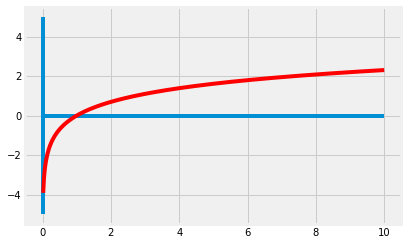

In [112]:
xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

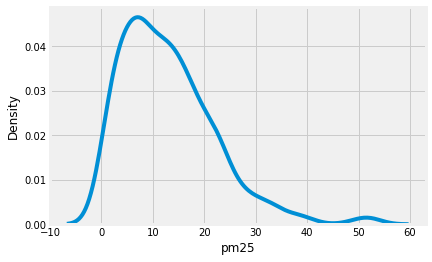

In [113]:
sns.kdeplot(y)
plt.show()

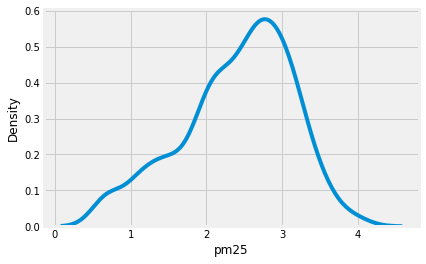

In [114]:
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

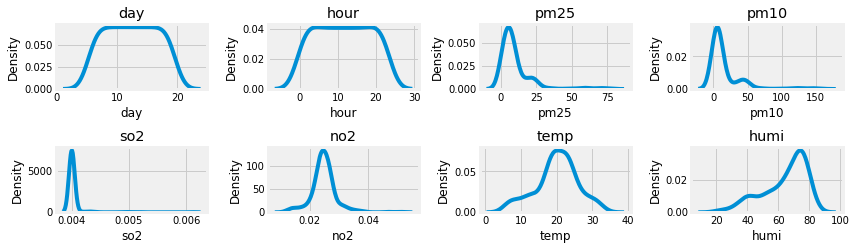

In [55]:
plt.figure(figsize = (12, 10))
feature_col = data['OA1'].columns
for i, feature in enumerate(feature_col):
    plt.subplot(6, 4, i + 1)
    plt.title(feature)
    sns.kdeplot(X_train[feature])
plt.tight_layout()

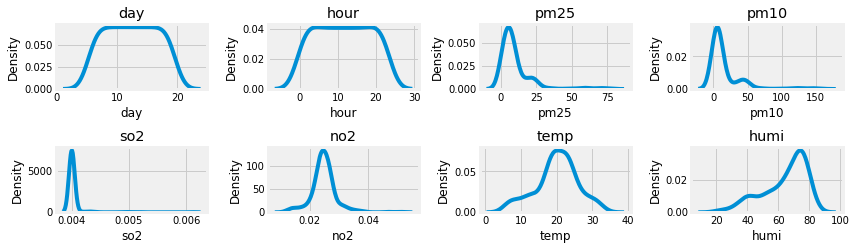

In [56]:
plt.figure(figsize = (12, 10))
feature_col = data['OA3'].columns
for i, feature in enumerate(feature_col):
    plt.subplot(6, 4, i + 1)
    plt.title(feature)
    sns.kdeplot(X_train[feature])
plt.tight_layout()

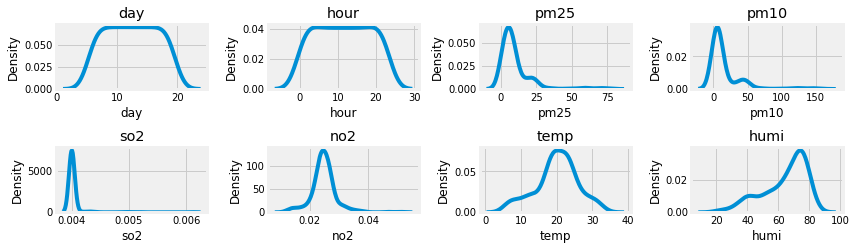

In [57]:
plt.figure(figsize = (12, 10))
feature_col = data['OA4'].columns
for i, feature in enumerate(feature_col):
    plt.subplot(6, 4, i + 1)
    plt.title(feature)
    sns.kdeplot(X_train[feature])
plt.tight_layout()

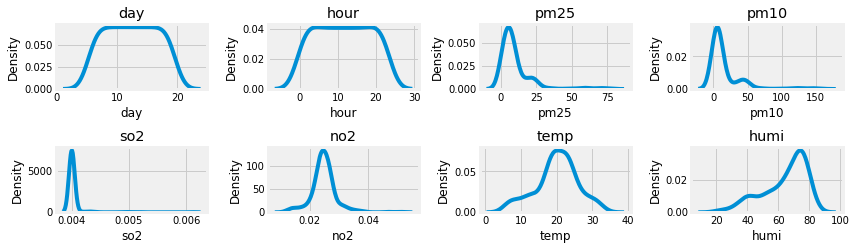

In [58]:
plt.figure(figsize = (12, 10))
feature_col = data['OA5'].columns
for i, feature in enumerate(feature_col):
    plt.subplot(6, 4, i + 1)
    plt.title(feature)
    sns.kdeplot(X_train[feature])
plt.tight_layout()

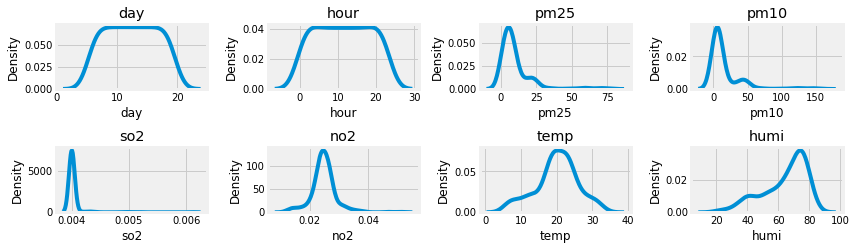

In [59]:
plt.figure(figsize = (12, 10))
feature_col = data['OA7'].columns
for i, feature in enumerate(feature_col):
    plt.subplot(6, 4, i + 1)
    plt.title(feature)
    sns.kdeplot(X_train[feature])
plt.tight_layout()

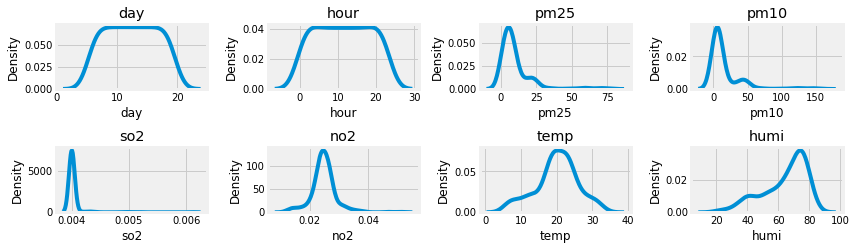

In [60]:
plt.figure(figsize = (12, 10))
feature_col = data['OA8'].columns
for i, feature in enumerate(feature_col):
    plt.subplot(6, 4, i + 1)
    plt.title(feature)
    sns.kdeplot(X_train[feature])
plt.tight_layout()

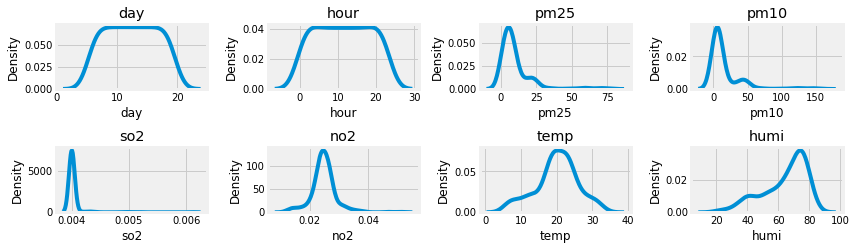

In [61]:
plt.figure(figsize = (12, 10))
feature_col = data['OA10'].columns
for i, feature in enumerate(feature_col):
    plt.subplot(6, 4, i + 1)
    plt.title(feature)
    sns.kdeplot(X_train[feature])
plt.tight_layout()

In [120]:
skew_columns = ['pm25', 'pm10', 'so2', 'humi']

for c in skew_columns:
    data['OA1'][c] = np.log1p(data['OA1'][c].values)
    
for c in skew_columns:
    data['OA3'][c] = np.log1p(data['OA3'][c].values)

for c in skew_columns:
    data['OA4'][c] = np.log1p(data['OA4'][c].values)
    
for c in skew_columns:
    data['OA5'][c] = np.log1p(data['OA5'][c].values)
    
for c in skew_columns:
    data['OA7'][c] = np.log1p(data['OA7'][c].values)
    
for c in skew_columns:
    data['OA8'][c] = np.log1p(data['OA8'][c].values)
    
for c in skew_columns:
    data['OA10'][c] = np.log1p(data['OA10'][c].values)

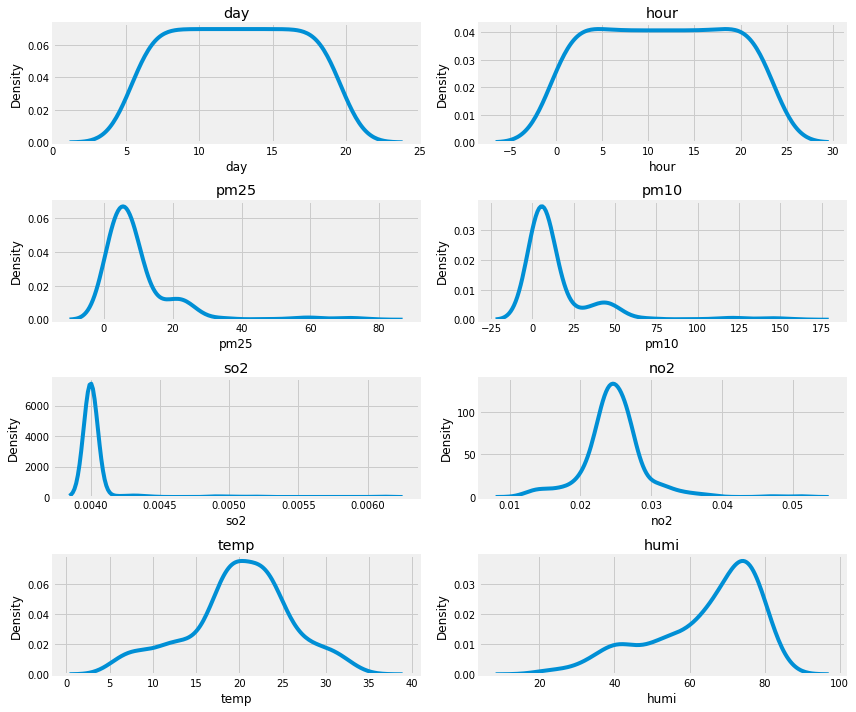

In [121]:
plt.figure(figsize = (12, 10))
feature_col = data['OA1'].columns
for i, feature in enumerate(feature_col):
    plt.subplot(4, 2, i + 1)
    plt.title(feature)
    sns.kdeplot(X_train[feature])
plt.tight_layout()

## 4. 모델 학습 및 평가

### 4-1. 선형회귀

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [65]:
X_train_scaled.shape, y_train.shape

((344, 8), (344,))

In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
def print_metrics(y, y_pred, average = 'micro', title=None):
    mse = np.round(mean_squared_error(y, y_pred), 3)
    rmse = np.round(np.sqrt(mse), 3)
    mae = np.round(mean_absolute_error(y, y_pred), 3)
    r2 = np.round(r2_score(y, y_pred), 3)
    if title:
        print(title)
    print(f"MSE:{mse}, RMSE:{rmse},MAE:{mae}, R2:{r2}")

In [67]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
# 예측
pred_train = lr.predict(X_train_scaled)
pred_test = lr.predict(X_test_scaled)

print_metrics(y_train, pred_train, title='LinearRegressor: Train')
print_metrics(y_test, pred_test, title="LinearRegressor: Test")

LinearRegressor: Train
MSE:14.65, RMSE:3.828,MAE:3.104, R2:0.478
LinearRegressor: Test
MSE:181.213, RMSE:13.462,MAE:11.316, R2:-0.947


### MSE (Mean Squared Error)

오차 제곱의 평균
실제 값(y_i)과 예측값(\hat{y_i})의 차를 제곱해 평균낸 것
mean_squared_error()
'neg_mean_squared_error' - GridSearch에서 scoring에 지정할 때
오차가 작을수록 좋은 모델 -> GridSearch에서 sort_values하게 될 경우, 가장 큰 오차 가지고 있는 모델 순으로 정렬됨 -> 각 오차 앞에 -(negative) 붙여 정렬
평가지표 할 때는 다시 -1 곱해, 원래 오차 값으로 되돌림$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2\\
y_i: 실제값, \hat{y_i}: 모델이 예측한 값
$$
### MAE (Mean Absolute Error)

오차 절대값의 평균
실제 값과 예측값의 차이의 절대값을 평균낸 것
### RMSE (Root Mean Squared Error)

MSE의 제곱근. MSE는 오차의 제곱 값이므로 실제 오차 평균보다 큰 값 나옴
scikit-learn은 함수 지원하지 않음(MSE 구한 뒤, np.sqrt()로 제곱근을 구함)$$
RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y_i})^2}
$$
### $R^2$ (R square, 결정계수)

예측 성능 알려주는 값
평균으로 예측했을 때 오차(총오차)보다 모델을 사용했을 때 얼마만큼 더 좋은 성능 내는지를 비율로 나타낸 값
1에 가까울수록 좋은 모델

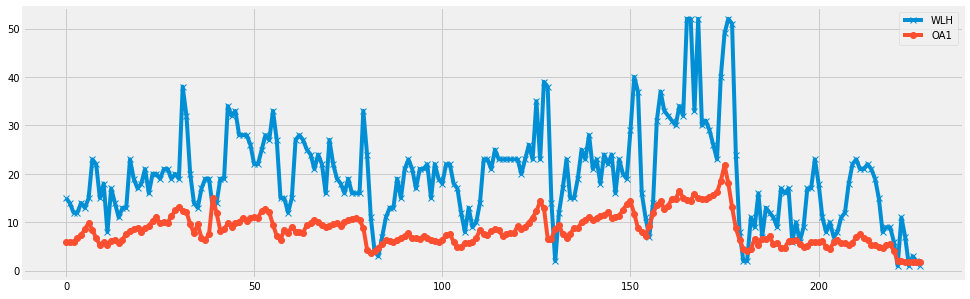

In [69]:
# 실제 값과 예측 가격을 plotting (Test Set 예측결과로)
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(range(len(y_test)), y_test, label='WLH', marker='x')
plt.plot(range(len(pred_test)), pred_test, label='OA1', marker='o')
plt.legend()
plt.show()

### 4-2. 앙상블 모델

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [71]:
from sklearn.pipeline import make_pipeline

knn = KNeighborsClassifier(n_neighbors = 5)
rf = RandomForestClassifier(n_estimators = 200)
# soft_voting으로 진행할 경우, probability = True로 지정(확률)
svc = SVC(C = 1.0, gamma = 0.1, probability = True)

# 추정기 
# estimators = [('knn', knn), 
#               ('random forest', rf), 
#               ('svm', svc)]

# knn, svc는 Scaling 처리. RF는 처리 안함. 
knn_pipe = make_pipeline(StandardScaler(), knn)
svc_pipe = make_pipeline(StandardScaler(), svc)
estimators = [('knn', knn_pipe), 
              ('random forest', rf), 
              ('svm', svc_pipe)]

voting = VotingClassifier(estimators)

In [72]:
# estimators에 등록할 모든 모델을 학습시킴
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              Pipeline(memory=None,
                                       steps=[('standardscaler',
                                               StandardScaler(copy=True,
                                                              with_mean=True,
                                                              with_std=True)),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier(algorithm='auto',
                                                                    leaf_size=30,
                                                                    metric='minkowski',
                                                                    metric_params=None,
                                                                    n_jobs=None,
                                                                    n_neighbors=5,
                                     

In [73]:
# 예측
pred_train = voting.predict(X_train)
pred_test = voting.predict(X_test)

In [74]:
from sklearn import metrics
metrics.recall_score(y_train, pred_train, average = 'micro')

0.502906976744186

In [75]:
print_metrics(y_train, pred_train, "Train 데이터셋 - Hard Voting")

MSE:20.64, RMSE:4.543,MAE:2.68, R2:0.264


In [76]:
print_metrics(y_test, pred_test, "Test 데이터셋 - Hard Voting")

MSE:243.346, RMSE:15.6,MAE:12.925, R2:-1.614


In [77]:
# pipeline - scaling해서 성능 올라감
print_metrics(y_train, pred_train, "Train 데이터셋 - Hard Voting")
print_metrics(y_test, pred_test, "Test 데이터셋 - Hard Voting")

MSE:20.64, RMSE:4.543,MAE:2.68, R2:0.264
MSE:243.346, RMSE:15.6,MAE:12.925, R2:-1.614


In [78]:
voting_soft = VotingClassifier(estimators,
                               voting = 'soft')  # default: "hard"

In [79]:
voting_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('knn',
                              Pipeline(memory=None,
                                       steps=[('standardscaler',
                                               StandardScaler(copy=True,
                                                              with_mean=True,
                                                              with_std=True)),
                                              ('kneighborsclassifier',
                                               KNeighborsClassifier(algorithm='auto',
                                                                    leaf_size=30,
                                                                    metric='minkowski',
                                                                    metric_params=None,
                                                                    n_jobs=None,
                                                                    n_neighbors=5,
                                     

In [80]:
pred_train_soft = voting_soft.predict(X_train)
pred_test_soft = voting_soft.predict(X_test)

In [81]:
# 일반적으로, soft voting이 hard voting보다 성능이 더 잘 나옴
print_metrics(y_train, pred_train_soft, "TrainSet-Soft Voting")
print_metrics(y_test, pred_test_soft, "TestSet_Soft Voting")

MSE:0.044, RMSE:0.21,MAE:0.02, R2:0.998
MSE:122.667, RMSE:11.076,MAE:8.333, R2:-0.318


In [82]:
# Pipeline
print_metrics(y_train, pred_train_soft, "TrainSet-Soft Voting")
print_metrics(y_test, pred_test_soft, "TestSet_Soft Voting")

MSE:0.044, RMSE:0.21,MAE:0.02, R2:0.998
MSE:122.667, RMSE:11.076,MAE:8.333, R2:-0.318


### 4-3. SVM

In [83]:
import sklearn.svm as svm
from sklearn.model_selection import cross_val_score, cross_validate

In [84]:
rbf_svc = SVC(kernel = 'rbf',
          C = 1,
          gamma = 0.01,
          random_state = 1)
rbf_svc.fit(X_train_scaled, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [85]:
pred_train = rbf_svc.predict(X_train_scaled)
pred_test = rbf_svc.predict(X_test_scaled)

In [86]:
print_metrics(y_test, pred_test)

MSE:251.066, RMSE:15.845,MAE:13.11, R2:-1.697


### 4-4. Ridge Regression

In [87]:
from sklearn.linear_model import Ridge

ridge_1 = Ridge(alpha = 1) #alpha : 기본값 - 1
# ridge_1 = Ridge(alpha=25) -> 가중치 작아짐 -> 규제 강도 높이는 것
ridge_1.fit(X_train_scaled, y_train)

pred_train = ridge_1.predict(X_train_scaled)
pred_test = ridge_1.predict(X_test_scaled)

In [88]:
print_metrics(y_train, pred_train, title='Ridge alpha 1: Train')
print_metrics(y_test, pred_test, title="Ridge alpha 1: Test")

Ridge alpha 1: Train
MSE:14.887, RMSE:3.858,MAE:3.175, R2:0.469
Ridge alpha 1: Test
MSE:181.421, RMSE:13.469,MAE:11.307, R2:-0.949


In [89]:
# -> 가중치 작아짐 -> 규제 강도 높이는 것
ridge_1 = Ridge(alpha=25) 
ridge_1.fit(X_train_scaled, y_train)

pred_train = ridge_1.predict(X_train_scaled)
pred_test = ridge_1.predict(X_test_scaled)

In [90]:
# 하이퍼파라미터 알파 = 25로 했을 때 
print_metrics(y_train, pred_train, title='Ridge alpha 25: Train')
print_metrics(y_test, pred_test, title="Ridge alpha 25: Test")

Ridge alpha 25: Train
MSE:16.618, RMSE:4.077,MAE:3.413, R2:0.408
Ridge alpha 25: Test
MSE:183.501, RMSE:13.546,MAE:11.315, R2:-0.971


#### GridSearchCV

In [91]:
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.01, 0.1,0.5,1,10,20,30,40,50,100]}
ridge = Ridge()
gs = GridSearchCV(ridge, param_grid = param, cv = 5, n_jobs=-1, scoring=['r2','neg_mean_squared_error'], refit='r2')

In [92]:
gs.fit(X_train_scaled, y_train)

C:\Users\Jiyoon\anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1, 10, 20, 30, 40, 50, 100]},
             pre_dispatch='2*n_jobs', refit='r2', return_train_score=False,
             scoring=['r2', 'neg_mean_squared_error'], verbose=0)

In [93]:
import pandas as pd
cv_result = pd.DataFrame(gs.cv_results_).sort_values('rank_test_neg_mean_squared_error')
cv_result.filter(like='mean_test').join(cv_result.filter(like='param'))

mean_test_r2  mean_test_neg_mean_squared_error param_alpha           params
9     -0.156198                        -22.598825         100   {'alpha': 100}
8     -0.199177                        -24.057992          50    {'alpha': 50}
7     -0.214532                        -24.588870          40    {'alpha': 40}
0     -0.115560                        -25.113222        0.01  {'alpha': 0.01}
1     -0.123371                        -25.206239         0.1   {'alpha': 0.1}
6     -0.233173                        -25.247774          30    {'alpha': 30}
2     -0.153980                        -25.611310         0.5   {'alpha': 0.5}
3     -0.183217                        -26.031963           1     {'alpha': 1}
5     -0.254783                        -26.054543          20    {'alpha': 20}
4     -0.272748                        -26.929507          10    {'alpha': 10}

	**Ridge alpha 0: Train**
MSE:14.65, RMSE:3.828,MAE:3.104, R2:0.478
	**Ridge alpha  0: Test**
MSE:181.213, RMSE:13.462,MAE:11.316, R2:-0.947
--------------------------------------------------
	**Ridge alpha 0.1: Train**
MSE:14.655, RMSE:3.828,MAE:3.113, R2:0.478
	**Ridge alpha  0.1: Test**
MSE:181.222, RMSE:13.462,MAE:11.313, R2:-0.947
--------------------------------------------------
	**Ridge alpha 1: Train**
MSE:14.887, RMSE:3.858,MAE:3.175, R2:0.469
	**Ridge alpha  1: Test**
MSE:181.421, RMSE:13.469,MAE:11.307, R2:-0.949
--------------------------------------------------
	**Ridge alpha 10: Train**
MSE:16.215, RMSE:4.027,MAE:3.359, R2:0.422
	**Ridge alpha  10: Test**
MSE:182.667, RMSE:13.515,MAE:11.305, R2:-0.962
--------------------------------------------------
	**Ridge alpha 100: Train**
MSE:17.057, RMSE:4.13,MAE:3.483, R2:0.392
	**Ridge alpha  100: Test**
MSE:186.17, RMSE:13.644,MAE:11.35, R2:-1.0
--------------------------------------------------
	**Ridge alpha 200: Train**
MSE

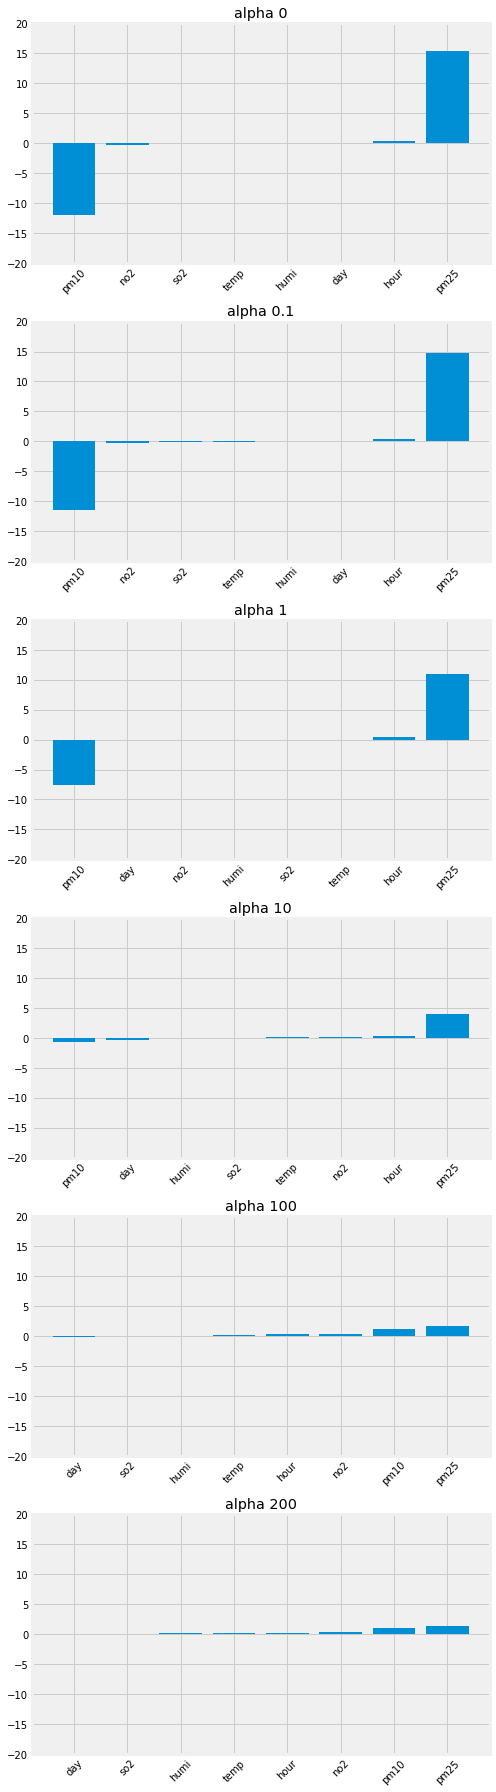

In [94]:
import matplotlib.pyplot as plt
np.random.seed(1)
alpha_list = [0, 0.1, 1, 10, 100,200]
coef_df = pd.DataFrame()

plt.figure(figsize=(7,25))
for idx, alpha in enumerate(alpha_list, start=1):
#     print(alpha)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    
    pred_train = ridge.predict(X_train_scaled)
    pred_test = ridge.predict(X_test_scaled)

    print_metrics(y_train, pred_train, title=f'\t**Ridge alpha {alpha}: Train**')
    print_metrics(y_test, pred_test, title=f"\t**Ridge alpha  {alpha}: Test**")
    print("-"*50)
    w = pd.Series(np.round(ridge.coef_,3), index=X_train.columns).sort_values()
    coef_df[f'alpha {alpha}'] = w
    plt.subplot(6,1,idx)
    
    plt.bar(x=w.index, height=w)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20) # y를 고정해야 변화가 잘 보인다.
    plt.title(f"alpha {alpha}")
    plt.grid(True)


plt.tight_layout() #간격 자동조절
plt.show()

In [95]:
coef_df

alpha 0  alpha 0.1  alpha 1  alpha 10  alpha 100  alpha 200
pm10  -11.990    -11.372   -7.605    -0.769      1.095      1.067
no2    -0.240     -0.215   -0.065     0.207      0.286      0.289
so2    -0.048     -0.048   -0.045    -0.040     -0.031     -0.026
temp   -0.047     -0.043   -0.019     0.053      0.166      0.164
humi    0.008     -0.001   -0.055    -0.112      0.074      0.142
day     0.034      0.013   -0.113    -0.288     -0.103     -0.037
hour    0.406      0.399    0.353     0.276      0.264      0.244
pm25   15.338     14.718   10.930     4.000      1.665      1.356

### 4-5. Lasso(Least Absolute Shrinkage and Selection Operator) Regression

In [96]:
from sklearn.linear_model import Lasso

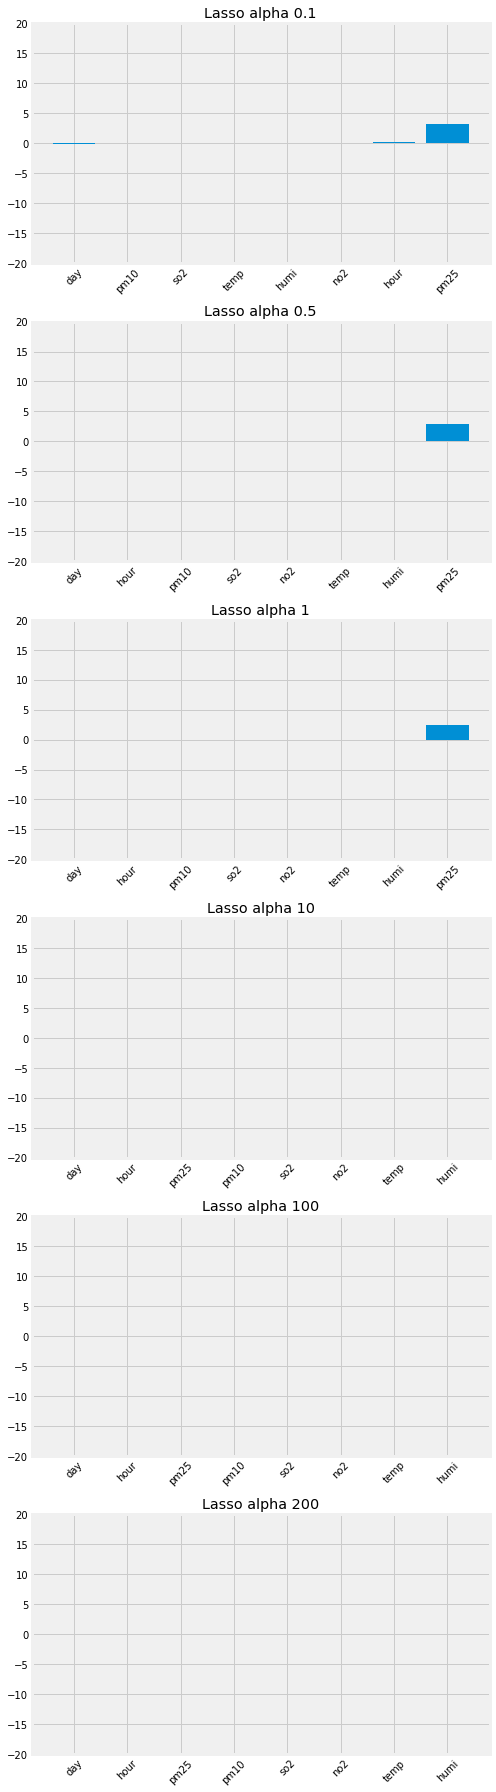

In [97]:
import matplotlib.pyplot as plt
alpha_list = [0.1, 0.5, 1, 10, 100, 200]

lasso_coef_df = pd.DataFrame()

plt.figure(figsize=(7,25))
for idx, alpha in enumerate(alpha_list, start=1):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)
    
    w = pd.Series(lasso.coef_, index=X_train.columns).sort_values()
    lasso_coef_df[f'alpha {alpha}'] = w
    plt.subplot(6,1,idx)
    
    plt.bar(x=w.index, height=w)
    plt.xticks(rotation=45)
    plt.ylim(-20, 20)
    plt.title(f"Lasso alpha {alpha}")
    plt.grid(True)
    
plt.tight_layout() #간격 자동조절
plt.show()    

In [98]:
print_metrics(y_train, pred_train, title = 'Lasso: Train')
print_metrics(y_test, pred_test, title = "Lasso: Test")

Lasso: Train
MSE:17.475, RMSE:4.18,MAE:3.542, R2:0.377
Lasso: Test
MSE:188.873, RMSE:13.743,MAE:11.384, R2:-1.029


In [99]:
lasso_coef_df

alpha 0.1  alpha 0.5   alpha 1  alpha 10  alpha 100  alpha 200
day   -0.163974  -0.000000 -0.000000       0.0        0.0        0.0
pm10  -0.000000   0.000000  0.000000       0.0        0.0        0.0
so2   -0.000000  -0.000000 -0.000000      -0.0       -0.0       -0.0
temp   0.000000   0.000000  0.000000       0.0        0.0        0.0
humi   0.000000   0.000000  0.000000       0.0        0.0        0.0
no2    0.024009   0.000000  0.000000       0.0        0.0        0.0
hour   0.241112   0.000000  0.000000       0.0        0.0        0.0
pm25   3.273445   2.878342  2.378342       0.0        0.0        0.0

### 4-6. 엘라스틱넷
- 릿지와 라쏘 절충한 모델

In [100]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.6) #alpha 패널티, l1_ratio: 비율(라쏘쪽. 위의것으로 보면 앞의것의 r 지정.)
elastic.fit(X_train_scaled, y_train)

pred_train = elastic.predict(X_train_scaled)
pred_test = elastic.predict(X_test_scaled)

print_metrics(y_train, pred_train, title='ElasticNet alpha 0.1: Train')
print_metrics(y_test, pred_test, title="ElasticNet alpha 0.1: Test")

ElasticNet alpha 0.1: Train
MSE:16.48, RMSE:4.06,MAE:3.396, R2:0.412
ElasticNet alpha 0.1: Test
MSE:182.897, RMSE:13.524,MAE:11.309, R2:-0.965


## 5. 평가결과 정리
|모델|MSE|RMSE|MAE|R2|
|---|---|---|---|---|
|Logistic Regression|181.651|13.478|11.283|-0.951|
|앙상블(Hard Voting)|248.785|15.773|13.11|-1.673|
|Soft Voting|143.667|11.986|9.184|-0.543|
|SVM|254.311|15.947|13.154|-1.732|
|Ridge Regression|183.783|13.557|11.32|-0.974|
|Lasso|192.847|13.887|11.442|-1.072|
|Elasti-Net|182.897|13.524|11.309|-0.965|